# Predicting Heart Disease Using a Support Vector Classifier

## 1. Introduction:

### Background:

The purpose

### Objective:

### Datasets:

### Tech Stack:

The following tools and libraries are used in this project:
- Python
- Pandas
- Matplotlib
- Statsmodels

## 2. Setup and Imports:

### Library Imports:

In [1]:
# Standard library imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mean

# Scipy and Statsmodels imports for statistical analysis
from scipy.stats import pointbiserialr, chi2_contingency
import statsmodels.formula.api as smf

# Scikit-learn imports for machine learning models, metrics, and preprocessing
from sklearn.model_selection import (GridSearchCV, train_test_split, StratifiedKFold,
                                     cross_val_score, StratifiedShuffleSplit, cross_validate)
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import (accuracy_score, recall_score, precision_score, f1_score, 
                             confusion_matrix, classification_report, roc_curve, auc)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.decomposition import PCA

# IPython for HTML display
from IPython.core.display import HTML

### CSS Styling:

In [2]:
# Importing custom CSS for styling

css = open('style.css').read()
HTML('<style>{}</style>'.format(css))

## 3. Data Processing & Exploration - Kaggle Dataset

### 3.1 Data Processing

#### Data Loading

1. Load the dataset from 'kaggle-heart.csv' into a pandas DataFrame, handling missing values.
2. Preview the first 2 rows to ensure the data has been loaded correctly.

In [3]:
# Load the kaggle-heart.csv dataset into a DataFrame called "df_kaggle"
# We treat " ", "?", and "NA" as missing values and replace them with NaN
df_kaggle = pd.read_csv('kaggle-heart.csv', na_values=[" ","?","NA"])

# Display the first two rows of the dataset for inspection
df_kaggle.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0


#### Data Dictionary

1. Extract column names and data types from the dataset.
2. Add descriptions for each column based on the dataset documentation.
3. Calculate the min and max values for each numerical column.
4. Combine all information into a single DataFrame.

In [4]:
# Creating a Data Dictionary for the dataset:
# We will collect the following:
# - Field names (column names)
# - Data types
# - Descriptions (based on Kaggle's dataset page)
# - Max and Min values for numerical columns

# Column names and data types
kaggle_field_list = df_kaggle.columns.tolist()  # List of column names
kaggle_dtype_list = df_kaggle.dtypes.astype(str).tolist()  # List of column data types as strings

# Description of each field based on Kaggle's dataset page
kaggle_description_list = [
    "age",
    "sex",
    "chest pain type (4 values)",
    "resting blood pressure",
    "serum cholestoral in mg/dl",
    "fasting blood sugar > 120 mg/dl",
    "resting electrocardiographic results (values 0,1,2)",
    "maximum heart rate achieved",
    "exercise induced angina",
    "oldpeak = ST depression induced by exercise relative to rest",
    "the slope of the peak exercise ST segment",
    "number of major vessels (0-3) colored by flourosopy",
    "thal: 0 = normal; 1 = fixed defect; 2 = reversable defect",
    "presence of heart disease. 0 = no disease and 1 = disease."
]

# Max and min values for each column
kaggle_max_list = df_kaggle.max().to_list()  # List of max values for each column
kaggle_min_list = df_kaggle.min().to_list()  # List of min values for each column

# Combine all lists into one DataFrame for easier reference
kaggle_concat_list = [
    kaggle_field_list,
    kaggle_dtype_list,
    kaggle_description_list,
    kaggle_min_list,
    kaggle_max_list
]

# The lists need to be converted to Series before concatenating
df_kaggle_data_dictionary = pd.DataFrame(pd.concat([pd.Series(x) for x in kaggle_concat_list], axis=1))

# Set column names for the new DataFrame
df_kaggle_data_dictionary.columns = ["FieldName", "DataType", "Description", "Min", "Max"]

# Display the data dictionary rounded to 1 decimal point for readability
df_kaggle_data_dictionary.round(1)

,FieldName,DataType,Description,Min,Max
0,age,int64,age,29.0,77.0
1,sex,int64,sex,0.0,1.0
2,cp,int64,chest pain type (4 values),0.0,3.0
3,trestbps,int64,resting blood pressure,94.0,200.0
4,chol,int64,serum cholestoral in mg/dl,126.0,564.0
5,fbs,int64,fasting blood sugar > 120 mg/dl,0.0,1.0
6,restecg,int64,resting electrocardiographic results (values 0...,0.0,2.0
7,thalach,int64,maximum heart rate achieved,71.0,202.0
8,exang,int64,exercise induced angina,0.0,1.0
9,oldpeak,float64,oldpeak = ST depression induced by exercise re...,0.0,6.2


#### Summary Statistics

Generate summary statistics for the numerical columns in the dataset, rounding the results to two decimal places.

In [5]:
# Generate summary statistics for numerical columns and round the results to two decimal places
df_kaggle.describe().round(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00
mean,54.43,0.70,0.94,131.61,246.00,0.15,0.53,149.11,0.34,1.07,1.39,0.75,2.32,0.51
std,9.07,0.46,1.03,17.52,51.59,0.36,0.53,23.01,0.47,1.18,0.62,1.03,0.62,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,48.00,0.00,0.00,120.00,211.00,0.00,0.00,132.00,0.00,0.00,1.00,0.00,2.00,0.00
50%,56.00,1.00,1.00,130.00,240.00,0.00,1.00,152.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,275.00,0.00,1.00,166.00,1.00,1.80,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


**Notes:**
- The dataset appears to contain more rows than expected.
- We expected 303.
- This discrepancy may indicate data issues, such as extra rows or duplicate entries that need to be investigated and cleaned.

#### Count Null Values per Column

This step counts the missing (null) values in each column to assess the completeness of the dataset and guide decisions on handling missing data.

In [6]:
# Count the number of missing (null) values per column in the dataset
df_kaggle.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### Count Duplicated Rows

Calculate the number of duplicated rows in the dataset, helping identify copied data.

In [7]:
# Calculate the number of duplicated rows in the dataset
df_kaggle.duplicated().sum()

np.int64(723)

#### Count Unique Rows

Identify and count the unique rows in the dataset.

In [8]:
# Get the unique rows in the DataFrame (removing duplicates)
unique_rows = np.unique(df_kaggle, axis=0)

# Display the shape of the unique rows (number of unique records)
unique_rows.shape

(302, 14)

## 4. Data Processing & Exploration - UCI Dataset

### 4.1 Data Processing

#### Data Loading

1. Load 'processed.cleveland.data' into a DataFrame and identify na values.
2. View the first 2 rows.

In [9]:
# Load the Cleveland dataset into a DataFrame
df_cleveland = pd.read_csv(
    "processed.cleveland.data",
    na_values=[" ", "?", "NA"],
    encoding="ISO-8859-1",
    header=None,
    delimiter=","
)

# View the first two rows of the Cleveland dataset
df_cleveland.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2


#### Viewing information on nulls and datatypes

Display dataset structure, including non-null counts, and data types, to check for missing values and overall composition.

In [10]:
# Display information about the dataset
df_cleveland.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       303 non-null    float64
 1   1       303 non-null    float64
 2   2       303 non-null    float64
 3   3       303 non-null    float64
 4   4       303 non-null    float64
 5   5       303 non-null    float64
 6   6       303 non-null    float64
 7   7       303 non-null    float64
 8   8       303 non-null    float64
 9   9       303 non-null    float64
 10  10      303 non-null    float64
 11  11      299 non-null    float64
 12  12      301 non-null    float64
 13  13      303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


#### Data Dictionary

Create a data dictionary for the Cleveland dataset by extracting column names, data types, descriptions, and min/max values.

In [11]:
# Assign the dataset to df for reference
df = df_cleveland

# Creating a DataFrame showing column details: name, type, description, and min/max values
column_details = list(zip(
    df.columns,
    df.dtypes.astype(str),
    [
        "Age in years",
        "Sex (1 = male; 0 = female)",
        "Chest pain type (1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic)",
        "Resting blood pressure (mmHg on admission)",
        "Serum cholesterol (mg/dL)",
        "Fasting blood sugar > 120 mg/dL (1 = true, 0 = false)",
        "Resting electrocardiographic results (0: normal, 1: ST-T wave abnormality, 2: probable left ventricular hypertrophy)",
        "Maximum heart rate achieved",
        "Exercise-induced angina (1 = yes; 0 = no)",
        "ST depression induced by exercise relative to rest",
        "Slope of peak exercise ST segment (1: upsloping, 2: flat, 3: downsloping)",
        "Number of major vessels (0–3) colored by fluoroscopy",
        "Thalassemia (3: normal, 6: fixed defect, 7: reversible defect)",
        "Diagnosis of heart disease (0: <50% narrowing, 1: >50% narrowing)"
    ],
    df.min().tolist(),
    df.max().tolist()
))

# Creating the DataFrame
df_cleveland_data_dictionary = pd.DataFrame(
    column_details, 
    columns=["FieldName", "DataType", "Description", "Min", "Max"]
)

# Display the DataFrame
df_cleveland_data_dictionary

,FieldName,DataType,Description,Min,Max
0,0,float64,Age in years,29.0,77.0
1,1,float64,Sex (1 = male; 0 = female),0.0,1.0
2,2,float64,"Chest pain type (1: typical angina, 2: atypica...",1.0,4.0
3,3,float64,Resting blood pressure (mmHg on admission),94.0,200.0
4,4,float64,Serum cholesterol (mg/dL),126.0,564.0
5,5,float64,"Fasting blood sugar > 120 mg/dL (1 = true, 0 =...",0.0,1.0
6,6,float64,Resting electrocardiographic results (0: norma...,0.0,2.0
7,7,float64,Maximum heart rate achieved,71.0,202.0
8,8,float64,Exercise-induced angina (1 = yes; 0 = no),0.0,1.0
9,9,float64,ST depression induced by exercise relative to ...,0.0,6.2


#### Loading the other datasets

Load the Hungarian, Switzerland, and Long Beach datasets into DataFrames, handling missing values, encoding, and delimiters.

In [12]:
# Common parameters for reading datasets
read_params = {
    "na_values": [" ", "?", "NA"],
    "encoding": "ISO-8859-1",
    "header": None,
    "delimiter": ","
}

# Loading the Hungarian dataset into a DataFrame
df_hungarian = pd.read_csv("processed.hungarian.data", **read_params)

# Loading the Switzerland dataset into a DataFrame
df_switzerland = pd.read_csv("processed.switzerland.data", **read_params)

# Loading the Long Beach dataset into a DataFrame
df_longbeach = pd.read_csv("processed.va.data", **read_params)

#### Creating dictionary of location and df name

Create a dictionary to store all datasets, making them easier to access by name.

In [13]:
# Creating a dictionary to store all datasets for easier access by name
df_all_datasets_dict = {
    "Cleveland": df_cleveland,
    "Hungarian": df_hungarian,
    "Switzerland": df_switzerland,
    "Longbeach": df_longbeach
}

#### Getting shape of each location dataframe

Iterate through the datasets, retrieves the shape (rows and columns) of each, and stores the results in a summary DataFrame for easy comparison.

In [14]:
# Create a list to store the shape of each dataset
df_shape_list = [
    {
        "DataFrame": name, 
        "Rows": frame.shape[0], 
        "Columns": frame.shape[1]
    }
    for name, frame in df_all_datasets_dict.items()
]

# Convert the list of dictionaries into a DataFrame
df_all_shapes = pd.DataFrame(df_shape_list).set_index("DataFrame")

# Display the shape summary of all datasets
df_all_shapes


,Rows,Columns
DataFrame,,
Cleveland,303,14
Hungarian,294,14
Switzerland,123,14
Longbeach,200,14


#### New Column Names

Define a list of new column names that will be applied to all datasets to ensure consistency and clarity.

In [15]:
# Define a list of new column names for the datasets
new_column_names = [
    "Age",           # Age in years
    "Sex",           # 1 = male, 0 = female
    "ChestPain",     # Chest pain type
    "RestingBP",     # Resting blood pressure
    "Chol",          # Serum cholesterol
    "FastingBS",     # Fasting blood sugar > 120 mg/dl (1 = true, 0 = false)
    "RestingECG",    # Resting electrocardiographic results
    "HeartRateMax",  # Maximum heart rate achieved
    "ExeAngina",     # Exercise induced angina (1 = yes, 0 = no)
    "STDep",         # ST depression induced by exercise relative to rest
    "STSlope",       # Slope of peak exercise ST segment
    "ColouredMV",    # Number of major vessels (0-3) colored by fluoroscopy
    "Thalass",       # Thalassemia (3 = normal, 6 = fixed defect, 7 = reversible defect)
    "Diagnosis"      # Diagnosis of heart disease (0 = < 50% narrowing, 1 = > 50% narrowing)
]

#### Renaming columns

Applies the new column names to all datasets in the df_all_datasets_dict dictionary, ensuring consistency across datasets.

In [16]:
# Apply the new column names to all datasets
for name, frame in df_all_datasets_dict.items():
    # Assign the new column names to each DataFrame
    frame.columns = new_column_names

#### Summarising datatypes for each column in each dataset

Generates a summary of the data types for each column in each dataset, concatenating the results into a single DataFrame for easier comparison.

In [17]:
# Create a list of DataFrames containing the data types of each dataset's columns
df_dtype_list = []

for name, frame in df_all_datasets_dict.items():
    # Create a DataFrame of column data types for each dataset
    df_dtype = pd.DataFrame(frame.dtypes)
    
    # Rename the column to the dataset name for clarity
    df_dtype.columns = [name]
    
    # Append the DataFrame to the list
    df_dtype_list.append(df_dtype)

# Concatenate all DataFrames in the list into one DataFrame
df_all_dtypes = pd.concat(df_dtype_list, axis=1)

# Display the data types summary
df_all_dtypes

,Cleveland,Hungarian,Switzerland,Longbeach
Age,float64,int64,int64,int64
Sex,float64,int64,int64,int64
ChestPain,float64,int64,int64,int64
RestingBP,float64,float64,float64,float64
Chol,float64,float64,int64,float64
FastingBS,float64,float64,float64,float64
RestingECG,float64,float64,float64,int64
HeartRateMax,float64,float64,float64,float64
ExeAngina,float64,float64,float64,float64
STDep,float64,float64,float64,float64


#### Summarising null values in each column in each dataset

Counts the number of null (missing) values in each column of all datasets and generates a summary DataFrame. It also displays the null count for specific columns.

In [18]:
# Create a list of DataFrames containing the null value counts for each dataset's columns
df_null_list = []

for name, frame in df_all_datasets_dict.items():
    # Count the null values in each column of the current dataset
    df_null = pd.DataFrame(frame.isna().sum())
    
    # Rename the column to the dataset name for clarity
    df_null.columns = [name]
    
    # Append the DataFrame to the list
    df_null_list.append(df_null)

# Concatenate all DataFrames in the list into one DataFrame
df_all_null = pd.DataFrame(pd.concat(df_null_list, axis=1))

# Save the null values summary to a CSV file
df_all_null.to_csv("UCI_location_nulls.csv", index=True)

# Display the null values count for specific columns of interest
df_all_null.loc[["RestingBP", "Chol", "FastingBS", "RestingECG", "HeartRateMax", 
                 "ExeAngina", "STDep", "STSlope", "ColouredMV", "Thalass"]].T

,RestingBP,Chol,FastingBS,RestingECG,HeartRateMax,ExeAngina,STDep,STSlope,ColouredMV,Thalass
Cleveland,0,0,0,0,0,0,0,0,4,2
Hungarian,1,23,8,1,1,1,0,190,291,266
Switzerland,2,0,75,1,1,1,6,17,118,52
Longbeach,56,7,7,0,53,53,56,102,198,166


#### Adding Location column

Add a new column, "Location," to each dataset, which stores the name of the dataset as a string to track its source.

In [19]:
# Add a "Location" column to each dataset to identify the dataset source
for name, frame in df_all_datasets_dict.items():
    # Assign the dataset name to the new "Location" column
    frame["Location"] = name
    
    # Ensure that the "Location" column is stored as a string
    frame["Location"] = frame["Location"].astype(str)

#### Combining datasets

Concatenate all datasets into a single DataFrame and displays the first three rows.

In [20]:
# Concatenate all datasets into one combined DataFrame
df_combined = pd.concat(df_all_datasets_dict.values(), ignore_index=True)

# Display the first three rows of the combined dataset
df_combined.head(3)

,Age,Sex,ChestPain,RestingBP,Chol,FastingBS,RestingECG,HeartRateMax,ExeAngina,STDep,STSlope,ColouredMV,Thalass,Diagnosis,Location
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,Cleveland
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,Cleveland
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,Cleveland


#### Removing rows with missing values

Count the number of rows in the combined dataset that contain any missing values.

In [26]:
# Count the number of rows in the combined dataset with any missing values
missing_rows_count = len(df_combined[df_combined.isna().any(axis=1)])
missing_rows_count

621

Drop rows with any missing values from the combined dataset and displays the shape of the cleaned dataset.

In [27]:
# Drop rows with any missing values from the combined dataset
df_combined = df_combined.dropna()

# Display the shape of the cleaned dataset
df_combined.shape

(299, 15)

#### Counting remaining rows from each dataset

Count the number of rows for each dataset in the combined dataset and displays the results in a DataFrame.

In [28]:
# Count the number of rows for each dataset in the combined dataset
location_count_list = []

for name, frame in df_all_datasets_dict.items():
    # Get the count of rows for each location (dataset)
    location_count = (name, df_combined[df_combined["Location"] == name].shape[0])
    location_count_list.append(location_count)

# Create a DataFrame to display the count of rows per dataset location
df_location_count = pd.DataFrame(location_count_list, columns=["DataFrame", "NoNulls"]).style.hide(axis="index")

# Display the count of rows for each dataset
df_location_count

DataFrame,NoNulls
Cleveland,297
Hungarian,1
Switzerland,0
Longbeach,1


#### Creating dictionary of datatypes for columns

Convert specific columns in the df_combined DataFrame to their appropriate data types and display the resulting data types of all columns.

In [29]:
# Convert columns to appropriate data types
df_combined = df_combined.astype({
    "Age": "int64",
    "Sex": "category",
    "ChestPain": "category",
    "RestingBP": "int64",
    "Chol": "int64",
    "FastingBS": "category",
    "RestingECG": "category",
    "HeartRateMax": "int64",
    "ExeAngina": "category",
    "STDep": "float64",
    "STSlope": "category",
    "ColouredMV": "int64",
    "Thalass": "category",
    "Diagnosis": "category"
})

# Confirm the data types of each column in a structured format
df_combined_dtypes = pd.DataFrame(df_combined.dtypes, columns=["Dtype"])
df_combined_dtypes

,Dtype
Age,int64
Sex,category
ChestPain,category
RestingBP,int64
Chol,int64
FastingBS,category
RestingECG,category
HeartRateMax,int64
ExeAngina,category
STDep,float64


Looking at first five rows.

In [32]:
df_combined.head()

,Age,Sex,ChestPain,RestingBP,Chol,FastingBS,RestingECG,HeartRateMax,ExeAngina,STDep,STSlope,ColouredMV,Thalass,Diagnosis,Location
0,63,1.0,1.0,145,233,1.0,2.0,150,0.0,2.3,3.0,0,6.0,0,Cleveland
1,67,1.0,4.0,160,286,0.0,2.0,108,1.0,1.5,2.0,3,3.0,2,Cleveland
2,67,1.0,4.0,120,229,0.0,2.0,129,1.0,2.6,2.0,2,7.0,1,Cleveland
3,37,1.0,3.0,130,250,0.0,0.0,187,0.0,3.5,3.0,0,3.0,0,Cleveland
4,41,0.0,2.0,130,204,0.0,2.0,172,0.0,1.4,1.0,0,3.0,0,Cleveland


#### Adding SexMF column

Add a new column SexMF to the df_combined DataFrame, replacing 0 and 1 in the Sex column with F and M.

In [33]:
# Ensure 'Sex' column is categorical and rename categories to 'F' and 'M'
if df_combined["Sex"].dtype.name == "category":
    df_combined["SexMF"] = df_combined["Sex"].cat.rename_categories({0: "F", 1: "M"})

# Confirm the first few rows of the newly created 'SexMF' column
df_combined[["Sex", "SexMF"]].head()

,Sex,SexMF
0,1.0,M
1,1.0,M
2,1.0,M
3,1.0,M
4,0.0,F


#### Changing categorical values in cat columns

Rename groups in categorical columns based on a predefined dictionary, modifying the category values in the df_combined DataFrame.

In [36]:
# Dictionary for category renaming
dict_column_changes = {
    "Sex": {1.0: 1, 0.0: 0},
    "ChestPain": {1.0: 1, 2.0: 2, 3.0: 3, 4.0: 4},
    "FastingBS": {0.0: 0, 1.0: 1},
    "RestingECG": {0.0: 0, 1.0: 1, 2.0: 2},
    "ExeAngina": {1.0: 1, 0.0: 0},
    "STSlope": {1.0: 1, 2.0: 2, 3.0: 3},
    "Thalass": {3.0: 3, 6.0: 6, 7.0: 7}
}

# Rename the categories safely
for col, change in dict_column_changes.items():
    if df_combined[col].dtype.name == "category":
        df_combined[col] = df_combined[col].cat.rename_categories(change)

# Display a sample to confirm changes
df_combined[dict_column_changes.keys()].head(5)

,Sex,ChestPain,FastingBS,RestingECG,ExeAngina,STSlope,Thalass
0,1,1,1,2,0,3,6
1,1,4,0,2,1,2,3
2,1,4,0,2,1,2,7
3,1,3,0,0,0,3,3
4,0,2,0,2,0,1,3


#### Checking if categorical data is ordered

Check each column in df_combined to identify if categorical data is ordered and display the category labels.

In [37]:
# Inspect each column for data type and order status
for col in df_combined:
    if df_combined[col].dtype == "category":
        print(f"Column: {col}\nCategories: {df_combined[col].cat.categories.tolist()}\nOrdered: {df_combined[col].cat.ordered}\n")
    else:
        print(f"Column: {col}\nData Type: {df_combined[col].dtype}\n")

Column: Age
Data Type: int64

Column: Sex
Categories: [0, 1]
Ordered: False

Column: ChestPain
Categories: [1, 2, 3, 4]
Ordered: False

Column: RestingBP
Data Type: int64

Column: Chol
Data Type: int64

Column: FastingBS
Categories: [0, 1]
Ordered: False

Column: RestingECG
Categories: [0, 1, 2]
Ordered: False

Column: HeartRateMax
Data Type: int64

Column: ExeAngina
Categories: [0, 1]
Ordered: False

Column: STDep
Data Type: float64

Column: STSlope
Categories: [1, 2, 3]
Ordered: False

Column: ColouredMV
Data Type: int64

Column: Thalass
Categories: [3, 6, 7]
Ordered: False

Column: Diagnosis
Categories: [0, 1, 2, 3, 4]
Ordered: False

Column: Location
Data Type: object

Column: SexMF
Categories: ['F', 'M']
Ordered: False



#### Making "Diagnosis" ordered

Convert the Diagnosis column to an ordered categorical variable with specified categories.

In [39]:
# Convert 'Diagnosis' column to an ordered categorical variable with defined levels
df_combined["Diagnosis"] = pd.Categorical(
    df_combined["Diagnosis"], 
    categories=[0, 1, 2, 3, 4], 
    ordered=True
)

# Confirm the updated categorical properties
print(f"Categories: {df_combined['Diagnosis'].cat.categories.tolist()}")
print(f"Ordered: {df_combined['Diagnosis'].cat.ordered}")

Categories: [0, 1, 2, 3, 4]
Ordered: True


#### Making "DiagnosisYN" column

Create a new column DiagnosisYN to classify Diagnosis into binary categories (1: heart disease, 0: no heart disease) and convert it to a categorical variable.

In [40]:
# Create a new binary column 'DiagnosisYN' based on 'Diagnosis'
# 1 for heart disease (1-4), 0 for no heart disease (0)
df_combined["DiagnosisYN"] = np.where(df_combined["Diagnosis"].isin([1, 2, 3, 4]), 1, 0)

# Convert 'DiagnosisYN' to a categorical variable with defined categories
df_combined["DiagnosisYN"] = pd.Categorical(df_combined["DiagnosisYN"], categories=[0, 1], ordered=False)

# Verify the new column's categorical properties
print(f"Categories: {df_combined['DiagnosisYN'].cat.categories.tolist()}")
print(f"Ordered: {df_combined['DiagnosisYN'].cat.ordered}")

Categories: [0, 1]
Ordered: False


#### Check Dtypes and summaries

Display the data types of all columns in the df_combined DataFrame.

In [41]:
# Display the data types of all columns in the DataFrame
df_combined.dtypes

Age                int64
Sex             category
ChestPain       category
RestingBP          int64
Chol               int64
FastingBS       category
RestingECG      category
HeartRateMax       int64
ExeAngina       category
STDep            float64
STSlope         category
ColouredMV         int64
Thalass         category
Diagnosis       category
Location          object
SexMF           category
DiagnosisYN     category
dtype: object

Generate and round summary statistics for all numeric columns in the df_combined DataFrame to two decimal places.

In [42]:
# Generate summary statistics for numeric columns and round to 2 decimal places
df_combined.describe().round(2)

,Age,RestingBP,Chol,HeartRateMax,STDep,ColouredMV
count,299.00,299.00,299.00,299.00,299.00,299.00
mean,54.52,131.72,246.79,149.33,1.06,0.67
std,9.03,17.75,52.53,23.12,1.16,0.94
min,29.00,94.00,100.00,71.00,0.00,0.00
25%,48.00,120.00,211.00,132.50,0.00,0.00
50%,56.00,130.00,242.00,152.00,0.80,0.00
75%,61.00,140.00,275.50,165.50,1.60,1.00
max,77.00,200.00,564.00,202.00,6.20,3.00


#### Summary statistics for each Diagnosis type

Generate separate summary statistics for rows in df_combined where DiagnosisYN is 0 and 1, rounding the results to two decimal places.

In [50]:
# Summary for DiagnosisYN == 0
summary_no_disease = df_combined[df_combined["DiagnosisYN"] == 0].describe().round(2)

# Summary for DiagnosisYN == 1
summary_disease = df_combined[df_combined["DiagnosisYN"] == 1].describe().round(2)

# Optionally display summaries
display(summary_no_disease, summary_disease)

# Alternative: Group by DiagnosisYN for concise summaries
grouped_summary = df_combined.groupby("DiagnosisYN", observed=False).describe().round(2)
grouped_summary

,Age,RestingBP,Chol,HeartRateMax,STDep,ColouredMV
count,160.00,160.00,160.00,160.00,160.00,160.00
mean,52.64,129.18,243.49,158.58,0.60,0.28
std,9.55,16.37,53.76,19.04,0.79,0.63
min,29.00,94.00,126.00,96.00,0.00,0.00
25%,44.75,120.00,208.75,149.00,0.00,0.00
50%,52.00,130.00,235.50,161.00,0.20,0.00
75%,59.00,140.00,268.25,172.00,1.10,0.00
max,76.00,180.00,564.00,202.00,4.20,3.00


,Age,RestingBP,Chol,HeartRateMax,STDep,ColouredMV
count,139.00,139.00,139.00,139.00,139.00,139.00
mean,56.68,134.64,250.58,138.68,1.59,1.13
std,7.89,18.85,51.02,22.87,1.30,1.02
min,35.00,100.00,100.00,71.00,0.00,0.00
25%,52.50,120.00,217.50,124.50,0.60,0.00
50%,58.00,130.00,249.00,141.00,1.40,1.00
75%,62.00,145.00,283.50,156.50,2.50,2.00
max,77.00,200.00,409.00,195.00,6.20,3.00


Age                                             RestingBP  \
             count   mean   std   min    25%   50%   75%   max     count   
DiagnosisYN                                                                
0            160.0  52.64  9.55  29.0  44.75  52.0  59.0  76.0     160.0   
1            139.0  56.68  7.89  35.0  52.50  58.0  62.0  77.0     139.0   

                     ... STDep      ColouredMV                             \
               mean  ...   75%  max      count  mean   std  min  25%  50%   
DiagnosisYN          ...                                                    
0            129.18  ...   1.1  4.2      160.0  0.28  0.63  0.0  0.0  0.0   
1            134.64  ...   2.5  6.2      139.0  1.13  1.02  0.0  0.0  1.0   

                       
             75%  max  
DiagnosisYN            
0            0.0  3.0  
1            2.0  3.0  

[2 rows x 48 columns]

### 4.2 Data Exploration - Visualisations

#### Making lists of categorical data and numerical data

Create separate lists for categorical and numerical columns to organize the dataset for further analysis.

In [52]:
# Lists for categorical and numerical columns for easy access
columns_for_categorical = [
    "SexMF",    # Gender (Male/Female)
    "ChestPain", # Type of chest pain
    "FastingBS", # Fasting blood sugar
    "RestingECG", # Resting electrocardiographic results
    "ExeAngina",  # Exercise induced angina
    "STSlope",    # Slope of the peak exercise ST segment
    "Thalass",    # Thalassemia
    "Diagnosis",  # Diagnosis (original classes)
    "DiagnosisYN" # Diagnosis (binary: 1 for heart disease, 0 for no heart disease)
]

columns_for_numerical = [
    "Age",          # Age of the patient
    "RestingBP",    # Resting blood pressure
    "Chol",         # Cholesterol levels
    "HeartRateMax", # Maximum heart rate achieved
    "STDep",        # Depression of the ST segment
    "ColouredMV"    # Number of colored major vessels
]

#### Bar Chart - Sex

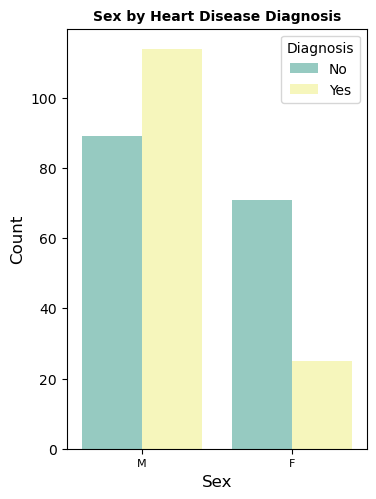

In [55]:
# Create a count plot for 'SexMF' grouped by 'DiagnosisYN'
plt.figure(figsize=(4, 5))

sns.countplot(
    x="SexMF", 
    order=["M", "F"], 
    palette="Set3", 
    hue="DiagnosisYN", 
    data=df_combined
)

# Adding title, labels, and styling
plt.title("Sex by Heart Disease Diagnosis", fontsize=10, fontweight='bold')
plt.xlabel('Sex', fontsize=12)
plt.xticks(
    ticks=[0, 1],
    labels=["M", "F"],
    fontsize=8
)
plt.ylabel('Count', fontsize=12)
plt.legend(
    title='Diagnosis', 
    labels=['No', 'Yes'], 
    loc='upper right',
    fontsize=10
)

# Adjusting layout to avoid clipping
plt.subplots_adjust(top=0.95)
plt.subplots_adjust(left=0.15)

# Display the plot
plt.show()

#### Bar Chart - ChestPain

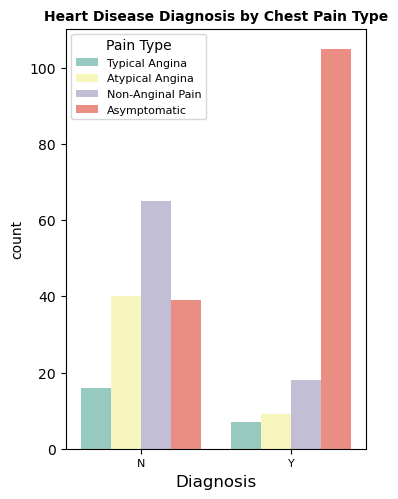

In [57]:
# Create a count plot for the 'DiagnosisYN' column, grouped by 'ChestPain'
plt.figure(figsize=(4,5))

sns.countplot(
    x="DiagnosisYN", 
    order=["0","1"], 
    palette="Set3", 
    hue="ChestPain", 
    data=df_combined
)

# Adding title, labels and styling
plt.title("Heart Disease Diagnosis by Chest Pain Type", fontsize=10, fontweight='bold')
plt.xlabel('Diagnosis', fontsize=12)
plt.xticks(
    ticks = [0, 1],
    labels = ["N","Y"],
    fontsize = 8
)

# Customize legend to show chest pain types
plt.legend(
    title='Pain Type', 
    labels=["Typical Angina", "Atypical Angina", "Non-Anginal Pain", "Asymptomatic"], 
    loc='upper left',
    fontsize=8
)

# Adjusting layout to avoid clipping
plt.subplots_adjust(top=0.95)
plt.subplots_adjust(left=0.15)

# Display the plot
plt.show()

#### Bar Chart - FastingBS

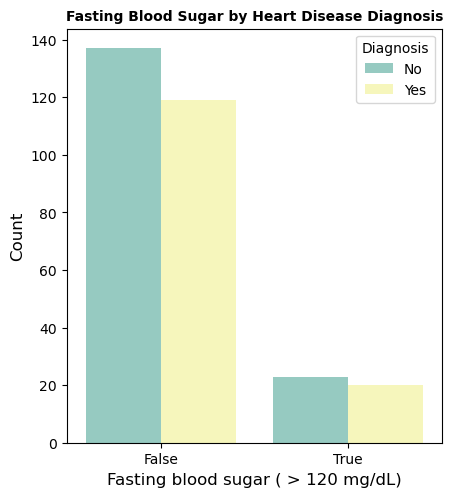

In [58]:
# Create a count plot for 'FastingBS', grouped by 'DiagnosisYN'
plt.figure(figsize=(5, 6))

sns.countplot(
    x="FastingBS", 
    order=["0", "1"],  # FastingBS: 0 = False, 1 = True
    palette="Set3", 
    hue="DiagnosisYN",  # Hue by heart disease diagnosis
    data=df_combined
)

# Add title, labels, and styling
plt.title("Fasting Blood Sugar by Heart Disease Diagnosis", fontsize=10, fontweight='bold')
plt.xlabel('Fasting blood sugar ( > 120 mg/dL)', fontsize=12)
plt.xticks(
    ticks=[0, 1],
    labels=["False", "True"],  # Labels for FastingBS: False = 0, True = 1
    fontsize=10
)
plt.ylabel('Count', fontsize=12)

# Customize legend to show diagnosis categories
plt.legend(
    title='Diagnosis', 
    labels=['No', 'Yes'],  # Legend for diagnosis: No = 0, Yes = 1
    loc='upper right',
    fontsize=10
)

# Adjust layout
plt.subplots_adjust(top=0.8)
plt.subplots_adjust(left=0.15)

# Display the plot
plt.show()

#### Bar Chart - RestingECG

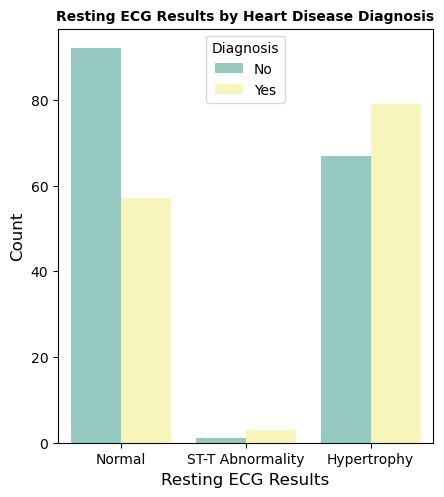

In [60]:
# Create a count plot for 'RestingECG', grouped by 'DiagnosisYN'
plt.figure(figsize=(5, 6))

sns.countplot(
    x="RestingECG", 
    order=["0", "1", "2"],  # RestingECG: 0 = Normal, 1 = ST-T Abnormality, 2 = Hypertrophy
    palette="Set3", 
    hue="DiagnosisYN",  # Hue by heart disease diagnosis
    data=df_combined
)

# Add title, labels, and styling
plt.title("Resting ECG Results by Heart Disease Diagnosis", fontsize=10, fontweight='bold')
plt.xlabel('Resting ECG Results', fontsize=12)
plt.xticks(
    ticks=[0, 1, 2],  # x-axis ticks for ECG results
    labels=["Normal", "ST-T Abnormality", "Hypertrophy"],  # RestingECG categories
    fontsize=10
)
plt.ylabel('Count', fontsize=12)

# Customize legend to show diagnosis categories
plt.legend(
    title='Diagnosis', 
    labels=['No', 'Yes'],  # Legend for diagnosis: No = 0, Yes = 1
    loc='upper center',
    fontsize=10
)

# Adjust layout
plt.subplots_adjust(top=0.8)
plt.subplots_adjust(left=0.15)

# Display the plot
plt.show()

#### Bar Chart - ExeAngina

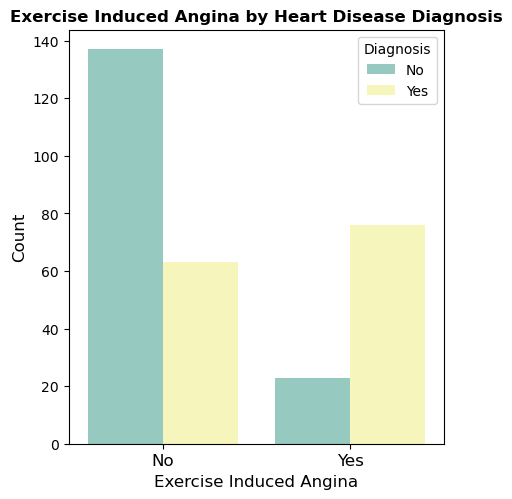

In [61]:
# Create a count plot for 'ExeAngina', grouped by 'DiagnosisYN'
plt.figure(figsize=(5, 6))

sns.countplot(
    x="ExeAngina", 
    order=["0", "1"],  # ExeAngina: 0 = No, 1 = Yes
    palette="Set3", 
    hue="DiagnosisYN",  # Hue by heart disease diagnosis
    data=df_combined
)

# Add title, labels, and styling
plt.title("Exercise Induced Angina by Heart Disease Diagnosis", fontsize=12, fontweight='bold')
plt.xlabel('Exercise Induced Angina', fontsize=12)
plt.xticks(
    ticks=[0, 1],  # x-axis ticks for angina types
    labels=['No', 'Yes'],  # Labels for ExeAngina categories
    fontsize=12
)
plt.ylabel('Count', fontsize=12)

# Customize legend to show diagnosis categories
plt.legend(
    title='Diagnosis', 
    labels=['No', 'Yes'],  # Legend for diagnosis: No = 0, Yes = 1
    loc='upper right',
    fontsize=10
)

# Adjust layout to avoid clipping
plt.subplots_adjust(top=0.8)
plt.subplots_adjust(left=0.15)

# Display the plot
plt.show()

#### Bar Chart - STSlope

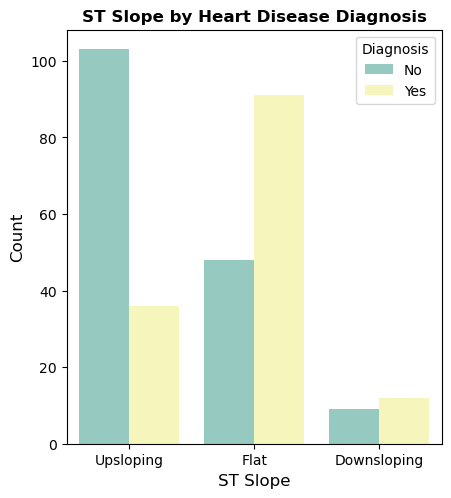

In [62]:
# Create a count plot for 'STSlope', grouped by 'DiagnosisYN'
plt.figure(figsize=(5, 6))

sns.countplot(
    x="STSlope", 
    order=["1", "2", "3"],  # Order for ST Slope: 1 = Upsloping, 2 = Flat, 3 = Downsloping
    palette="Set3", 
    hue="DiagnosisYN",  # Hue by heart disease diagnosis
    data=df_combined
)

# Add title, labels, and styling
plt.title("ST Slope by Heart Disease Diagnosis", fontsize=12, fontweight='bold')
plt.xlabel('ST Slope', fontsize=12)
plt.xticks(
    ticks=[0, 1, 2],  # x-axis ticks for slope types
    labels=["Upsloping", "Flat", "Downsloping"],  # Labels for Slope categories
    fontsize=10
)
plt.ylabel('Count', fontsize=12)

# Customize legend to show diagnosis categories
plt.legend(
    title='Diagnosis', 
    labels=['No', 'Yes'],  # Legend for diagnosis: No = 0, Yes = 1
    loc='upper right',
    fontsize=10
)

# Adjust layout to avoid clipping
plt.subplots_adjust(top=0.8)
plt.subplots_adjust(left=0.15)

# Display the plot
plt.show()


#### Bar Chart - Thalass

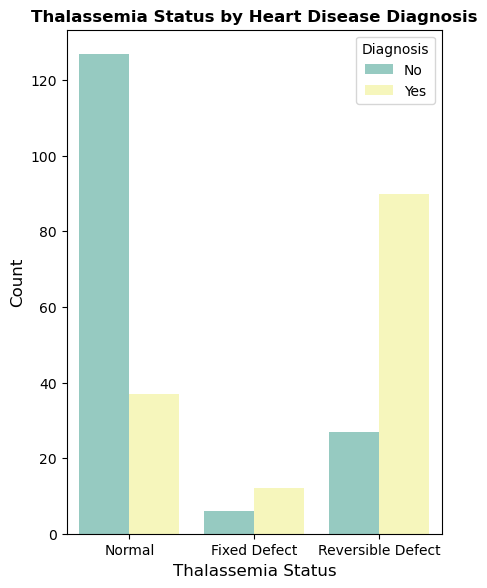

In [64]:
# Create a count plot for 'Thalass', grouped by 'DiagnosisYN'
plt.figure(figsize=(5, 6))

sns.countplot(
    x="Thalass", 
    order=["3", "6", "7"],  # Order for Thalassemia status: 3 = Normal, 6 = Fixed Defect, 7 = Reversible Defect
    palette="Set3", 
    hue="DiagnosisYN",  # Hue by heart disease diagnosis
    data=df_combined
)

# Add title, labels, and styling
plt.title("Thalassemia Status by Heart Disease Diagnosis", fontsize=12, fontweight='bold')
plt.xlabel('Thalassemia Status', fontsize=12)
plt.xticks(
    ticks=[0, 1, 2],  # x-axis ticks for Thalassemia categories
    labels=["Normal", "Fixed Defect", "Reversible Defect"],  # Labels for Thalassemia categories
    fontsize=10
)

plt.ylabel('Count', fontsize=12)

# Customize legend to show diagnosis categories
plt.legend(
    title='Diagnosis', 
    labels=['No', 'Yes'],  # Legend for diagnosis: No = 0, Yes = 1
    loc='upper right',
    fontsize=10
)

# Adjust layout to avoid clipping
plt.subplots_adjust(top=0.95)
plt.subplots_adjust(left=0.15)

# Display the plot
plt.show()

#### Bar Chart - ColouredMV

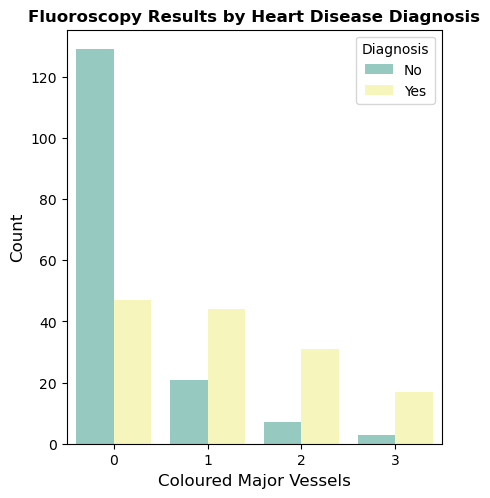

In [63]:
# Create a count plot for 'ColouredMV', grouped by 'DiagnosisYN'
plt.figure(figsize=(5,6))

sns.countplot(
    x="ColouredMV", 
    order=["0", "1", "2", "3"],  # Order for coloured major vessels: 0 = No vessels, 1-3 = Different numbers of vessels
    palette="Set3", 
    hue="DiagnosisYN",  # Hue by heart disease diagnosis
    data=df_combined
)

# Add title, labels, and styling
plt.title("Fluoroscopy Results by Heart Disease Diagnosis", fontsize=12, fontweight='bold')
plt.xlabel('Coloured Major Vessels', fontsize=12)
plt.xticks(
    ticks=[0, 1, 2, 3],  # x-axis ticks for coloured vessels
    labels=["0", "1", "2", "3"],  # Labels for number of vessels
    fontsize=10
)

plt.ylabel('Count', fontsize=12)

# Customize legend to show diagnosis categories
plt.legend(
    title='Diagnosis', 
    labels=['No', 'Yes'],  # Legend for diagnosis: No = 0, Yes = 1
    loc='upper right',
    fontsize=10
)

# Adjust layout to avoid clipping
plt.subplots_adjust(top=0.8)
plt.subplots_adjust(left=0.15)

# Display the plot
plt.show()

#### Histogram - Age

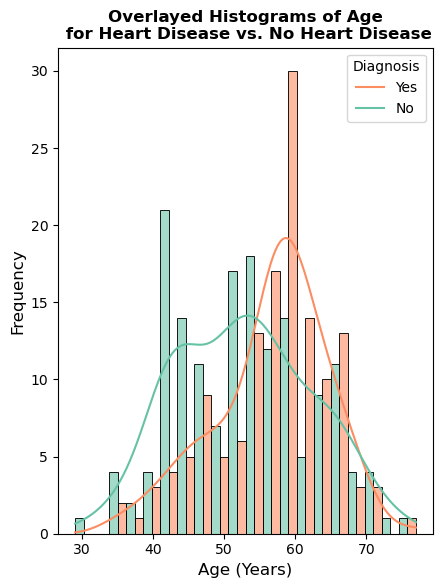

In [65]:
att = "Age"
att_name = "Age (Years)"
title = "Overlayed Histograms of Age\n for Heart Disease vs. No Heart Disease"

plt.figure(figsize=(5,6))

# Create a histogram of 'Age' with KDE, grouped by heart disease diagnosis
sns.histplot(
    data=df_combined,
    x=att,
    hue="DiagnosisYN",  # Group by heart disease diagnosis
    hue_order=[0,1],  # Order for the hue: No heart disease first
    kde=True,  # Kernel Density Estimate for smooth distribution curve
    bins=20,  # Increase the number of bins for more granularity
    palette="Set2",  # Color palette for the groups
    multiple="dodge",  # Separate the histograms for each group
    alpha=0.6  # Transparency for better overlay visibility
)

# Title, labels, and styling
plt.title(title, fontsize=12, fontweight='bold')
plt.xlabel(att_name, fontsize=12)
plt.ylabel("Frequency", fontsize=12)

# Customize the legend
plt.legend(
    title='Diagnosis', 
    labels=["Yes", "No"],  # Labels for the diagnosis groups
    loc='upper right',
    fontsize=10
)

# Adjust layout
plt.subplots_adjust(top=0.92)
plt.subplots_adjust(left=0.15)

# Display the plot
plt.show()

#### Box Plot - Age

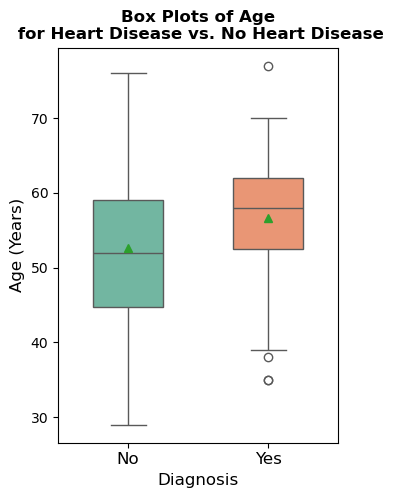

In [66]:
att = "Age"
att_name = "Age (Years)"
title = "Box Plots of Age\n for Heart Disease vs. No Heart Disease"

plt.figure(figsize=(4,5))

# Create a box plot for 'Age', grouped by heart disease diagnosis
sns.boxplot(
    data=df_combined,
    x="DiagnosisYN",  # Group by heart disease diagnosis
    y=att,  # The variable 'Age'
    hue="DiagnosisYN",  # Coloring by diagnosis
    palette="Set2",  # Color palette for the groups
    showmeans=True,  # Show the mean values on the plot
    width=0.5  # Adjust the width for better spacing
)

# Title, labels, and styling
plt.title(title, fontsize=12, fontweight='bold')
plt.xlabel("Diagnosis", fontsize=12)
plt.ylabel(att_name, fontsize=12)

# Customize the x-ticks to show 'No' and 'Yes' instead of 0 and 1
plt.xticks(
    ticks=[0, 1], 
    labels=['No', 'Yes'],  # Replace '0' with 'No' and '1' with 'Yes'
    fontsize=12
)

# Remove the legend
plt.legend([], [], frameon=False)

# Adjust layout for better spacing
plt.subplots_adjust(top=0.9)
plt.subplots_adjust(left=0.2)

# Display the plot
plt.show()

#### Histogram - RestingBP

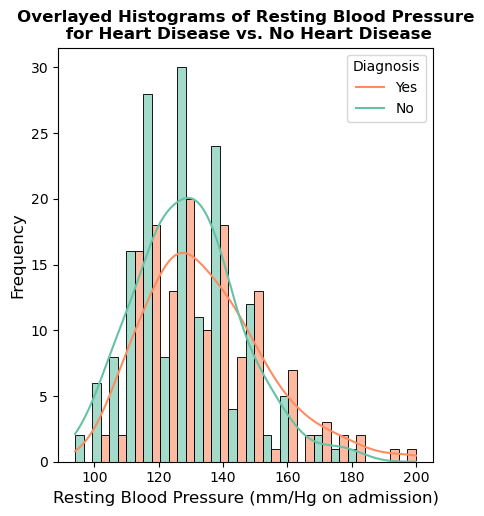

In [67]:
att = "RestingBP"
att_name = "Resting Blood Pressure (mm/Hg on admission)"
title = "Overlayed Histograms of Resting Blood Pressure\n for Heart Disease vs. No Heart Disease"

plt.figure(figsize=(5,6))

# Create a histogram of 'RestingBP' with KDE, grouped by heart disease diagnosis
sns.histplot(
    data=df_combined,
    x=att,
    hue="DiagnosisYN",  # Group by heart disease diagnosis
    hue_order=[0,1],  # Order for the hue: No heart disease first
    kde=True,  # Kernel Density Estimate for smooth distribution curve
    bins=20,  # Increase the number of bins for more granularity
    palette="Set2",  # Color palette for the groups
    multiple="dodge",  # Separate the histograms for each group
    alpha=0.6  # Transparency for better overlay visibility
)

# Title, labels, and styling
plt.title(title, fontsize=12, fontweight='bold')
plt.xlabel(att_name, fontsize=12)
plt.ylabel("Frequency", fontsize=12)

# Customize the legend
plt.legend(
    title='Diagnosis', 
    labels=["Yes", "No"],  # Labels for the diagnosis groups
    loc='upper right',
    fontsize=10
)

# Adjust layout
plt.subplots_adjust(top=0.8)
plt.subplots_adjust(left=0.15)

# Display the plot
plt.show()

#### Box Plot - RestingBP

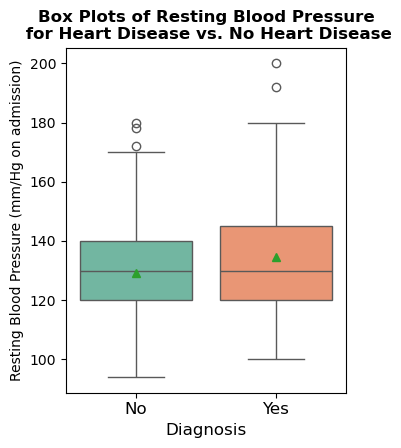

In [68]:
att = "RestingBP"
att_name = "Resting Blood Pressure (mm/Hg on admission)"
title = "Box Plots of Resting Blood Pressure\n for Heart Disease vs. No Heart Disease"

plt.figure(figsize=(4,5))

# Create a box plot for 'RestingBP', grouped by 'DiagnosisYN'
sns.boxplot(
    data=df_combined,
    x="DiagnosisYN",  # Group by heart disease diagnosis
    y=att,  # Plot RestingBP on the y-axis
    hue="DiagnosisYN",  # Add color based on diagnosis
    palette="Set2",  # Color palette for the groups
    showmeans=True  # Show mean values on the box plot
)

# Title, labels, and styling
plt.title(title, fontsize=12, fontweight='bold')
plt.xlabel("Diagnosis", fontsize=12)
plt.ylabel(att_name, fontsize=10)

# Customize x-ticks
plt.xticks(
    ticks=[0, 1], 
    labels=['No', 'Yes'],  # Replace 0 with 'No' and 1 with 'Yes'
    fontsize=12
)

# Remove the legend
plt.legend([],[],frameon=False)

# Adjust layout
plt.subplots_adjust(top=0.8)
plt.subplots_adjust(left=0.2)

# Display the plot
plt.show()

#### Histogram - Chol

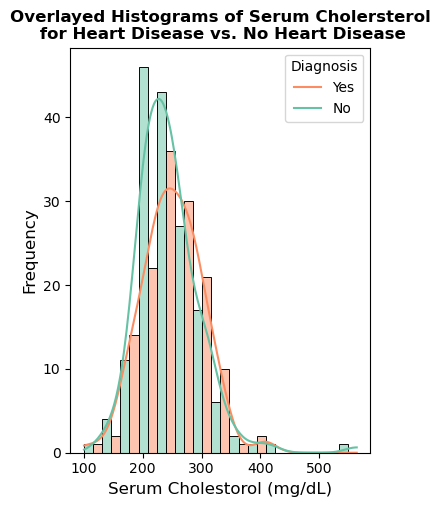

In [72]:
att = "Chol"
att_name = "Serum Cholestorol (mg/dL)"
title = "Overlayed Histograms of Serum Cholersterol\n for Heart Disease vs. No Heart Disease"

plt.figure(figsize=(4,5))

# Create a histogram with KDE for 'Chol', grouped by 'DiagnosisYN'
sns.histplot(
    data=df_combined,
    x=att,  # Plot Serum Cholesterol on the x-axis
    hue="DiagnosisYN",  # Group by heart disease diagnosis
    hue_order=[0, 1],  # '0' for No, '1' for Yes
    kde=True,  # Add KDE for smoother distribution visualization
    bins=15,  # Number of bins
    palette="Set2",  # Color palette for the groups
    multiple="dodge",  # Separate histograms for different hues
    alpha=0.5  # Transparency to overlay the histograms
)

# Add title, labels, and styling
plt.title(title, fontsize=12, fontweight='bold')
plt.xlabel(att_name, fontsize=12)
plt.ylabel("Frequency", fontsize=12)

# Customize the legend
plt.legend(
    title='Diagnosis', 
    labels=["Yes", "No"], 
    loc='upper right', 
    fontsize=10
)

# Adjust layout to avoid clipping
plt.subplots_adjust(top=0.92)
plt.subplots_adjust(left=0.15)

# Display the plot
plt.show()

#### Box Plot - Chol

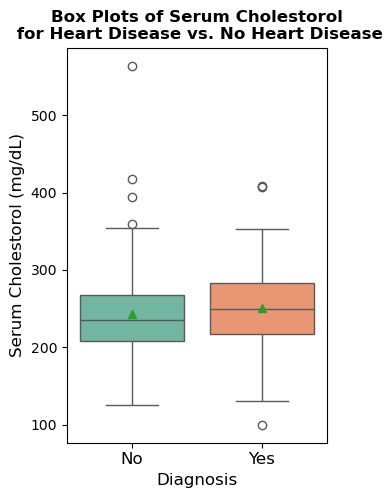

In [71]:
att = "Chol"
att_name = "Serum Cholestorol (mg/dL)"
title = "Box Plots of Serum Cholestorol\n for Heart Disease vs. No Heart Disease"

plt.figure(figsize=(4,5))

# Create a boxplot for 'Chol', grouped by 'DiagnosisYN'
sns.boxplot(
    data=df_combined,
    x="DiagnosisYN",  # Group by diagnosis (Heart Disease vs. No Heart Disease)
    y=att,  # Plot Serum Cholesterol on the y-axis
    hue="DiagnosisYN",  # Color the boxes by diagnosis
    palette="Set2",  # Color palette for the groups
    showmeans=True  # Show the mean value in the boxplot
)

# Add title and axis labels
plt.title(title, fontsize=12, fontweight='bold')
plt.xlabel("Diagnosis", fontsize=12)
plt.ylabel(att_name, fontsize=12)

# Customize x-ticks to display "No" and "Yes" for diagnosis
plt.xticks(
    ticks=[0, 1], 
    labels=['No', 'Yes'],  # Replace '0' with 'No' and '1' with 'Yes'
    fontsize=12
)

# Remove the legend as it is redundant with the labels on the x-axis
plt.legend([],[],frameon=False)

# Adjust layout to avoid clipping
plt.subplots_adjust(top=0.9)
plt.subplots_adjust(left=0.25)

# Display the plot
plt.show()

#### Histogram - HeartRateMax

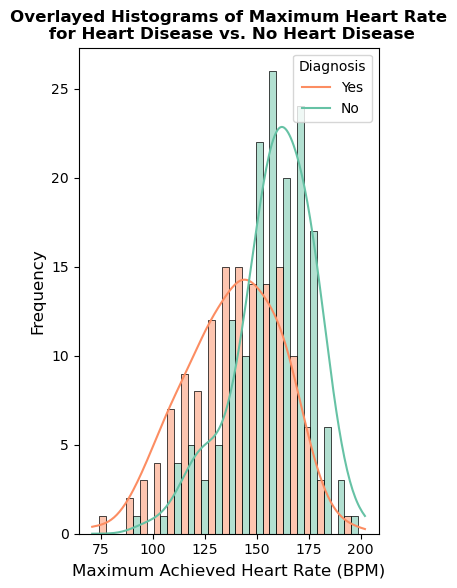

In [73]:
att = "HeartRateMax"
att_name = "Maximum Achieved Heart Rate (BPM)"
title = "Overlayed Histograms of Maximum Heart Rate\n for Heart Disease vs. No Heart Disease"

plt.figure(figsize=(4,6))

# Create a histogram with KDE for 'HeartRateMax', grouped by 'DiagnosisYN'
sns.histplot(
    data=df_combined,
    x=att,  # Plot the 'HeartRateMax' column on the x-axis
    hue="DiagnosisYN",  # Color the bars by diagnosis (Heart Disease vs. No Heart Disease)
    hue_order=[0,1],  # Order of hue labels (No Heart Disease first)
    kde=True,  # Display a kernel density estimate on the histogram
    bins=20,  # Adjusted number of bins for better clarity
    palette="Set2",  # Color palette for the groups
    multiple="dodge",  # Place the bars for each group next to each other
    alpha=0.5  # Transparency of the bars
)

# Add title and axis labels
plt.title(title, fontsize=12, fontweight='bold')
plt.xlabel(att_name, fontsize=12)
plt.ylabel("Frequency", fontsize=12)

# Customize the legend
plt.legend(
    title='Diagnosis', 
    labels=["Yes","No"], 
    loc='upper right',  # Position the legend in the upper right
    fontsize=10
)

# Adjust layout to avoid clipping of elements
plt.subplots_adjust(top=0.92)
plt.subplots_adjust(left=0.15)

# Display the plot
plt.show()

#### Box Plot - HeartRateMax

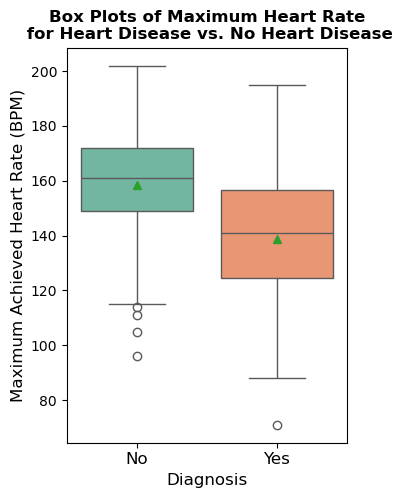

In [76]:
att = "HeartRateMax"
att_name = "Maximum Achieved Heart Rate (BPM)"
title = "Box Plots of Maximum Heart Rate\n for Heart Disease vs. No Heart Disease"

plt.figure(figsize=(4,5))  # Increased figure size for better clarity

# Create a boxplot comparing 'HeartRateMax' for different diagnoses ('Yes' or 'No')
sns.boxplot(
    data=df_combined,
    x="DiagnosisYN",  # x-axis represents diagnosis (No/Yes)
    y=att,  # y-axis represents 'HeartRateMax'
    hue="DiagnosisYN",  # Color boxes based on diagnosis (Heart Disease vs. No Heart Disease)
    palette="Set2",  # Color palette for the boxes
    showmeans=True  # Display the mean on the boxplot
)

# Set the title and axis labels
plt.title(title, fontsize=12, fontweight='bold')  # Increased title font size
plt.xlabel("Diagnosis", fontsize=12)
plt.ylabel(att_name, fontsize=12)  # Increased y-axis label font size

# Customize tick labels on x-axis
plt.xticks(
    ticks=[0, 1], 
    labels=['No', 'Yes'],  # Replace '0' with 'No' and '1' with 'Yes'
    fontsize=12
)

# Remove the legend as it is not needed for this plot
plt.legend([],[],frameon=False)

# Adjust the layout to avoid clipping of elements
plt.subplots_adjust(top=0.9)
plt.subplots_adjust(left=0.2)

# Display the plot
plt.show()

#### Histogram - STDep

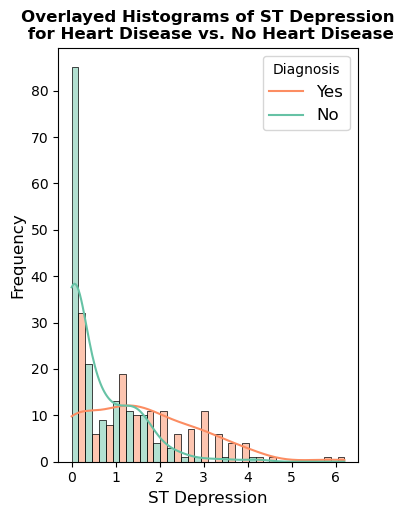

In [78]:
att = "STDep"
att_name = "ST Depression"
title = "Overlayed Histograms of ST Depression\n for Heart Disease vs. No Heart Disease"

plt.figure(figsize=(4,6))

# Create a histogram with KDE for 'STDep' for both diagnoses ('Yes' and 'No')
sns.histplot(
    data=df_combined,
    x=att,  # x-axis represents 'STDep'
    hue="DiagnosisYN",  # Color by diagnosis (Heart Disease vs. No Heart Disease)
    hue_order=[0,1],  # Order of hue categories (No = 0, Yes = 1)
    kde=True,  # Include KDE for smoothed distribution
    bins=20,  # Adjusted number of bins for better resolution
    palette="Set2",  # Color palette for the histogram
    multiple="dodge",  # Display bars side by side
    alpha=0.5  # Transparency level for the bars
)

# Set the title and axis labels
plt.title(title, fontsize=12, fontweight='bold')  # Increased title font size
plt.xlabel(att_name, fontsize=12)
plt.ylabel("Frequency", fontsize=12)

# Customize the legend
plt.legend(
    title='Diagnosis', 
    labels=["Yes","No"], 
    loc='upper right',
    fontsize=12  # Increased font size for legend
)

# Adjust layout to avoid clipping
plt.subplots_adjust(top=0.8)
plt.subplots_adjust(left=0.15)

# Display the plot
plt.show()

#### Box Plot - STDep

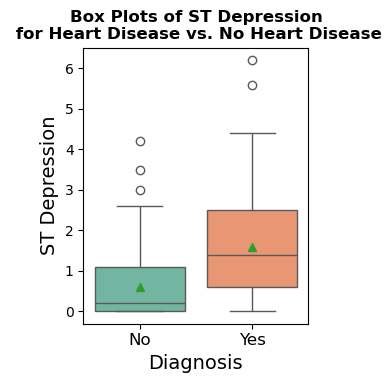

In [79]:
att = "STDep"
att_name = "ST Depression"
title = "Box Plots of ST Depression\n for Heart Disease vs. No Heart Disease"

plt.figure(figsize=(3,4))

# Create a box plot to show the distribution of 'STDep' for each diagnosis group
sns.boxplot(
    data=df_combined,
    x="DiagnosisYN",  # x-axis represents diagnosis categories (No vs. Yes)
    y=att,  # y-axis represents 'STDep'
    hue="DiagnosisYN",  # Color by diagnosis (Heart Disease vs. No Heart Disease)
    palette="Set2",  # Color palette for the plot
    showmeans=True  # Show the mean value in the box plot
)

# Set the title and axis labels with increased font size
plt.title(title, fontsize=12, fontweight='bold')  # Increased title font size
plt.xlabel("Diagnosis", fontsize=14)  # Increased label font size
plt.ylabel(att_name, fontsize=14)  # Increased label font size

# Customize x-axis ticks and labels
plt.xticks(
    ticks=[0, 1],  # x-axis positions
    labels=['No', 'Yes'],  # Labels for the diagnosis categories
    fontsize=12
)

# Remove the legend as it's not needed for this box plot
plt.legend([], [], frameon=False)

# Adjust layout to avoid clipping
plt.subplots_adjust(top=0.8)
plt.subplots_adjust(left=0.15)

# Display the plot
plt.show()

### 4.3 Data Exploration - Correlations

#### Correlation matrix

Generate a heatmap of the correlation matrix for numerical features in the dataset. The correlations are annotated inside the heatmap with two decimal places.

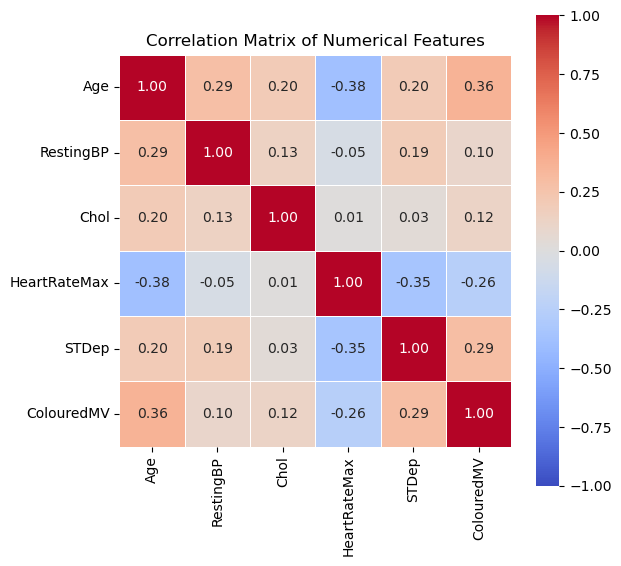

In [81]:
# Calculate the correlation matrix for selected numerical columns
corr_matrix = df_combined[columns_for_numerical].corr()

# Set up the figure for the heatmap
plt.figure(figsize=(7,7))  # Adjusted figure size for clearer view

# Create the heatmap of the correlation matrix
sns.heatmap(
    corr_matrix,              # Data to plot (correlation matrix)
    annot=True,               # Annotate the cells with correlation values
    fmt=".2f",                # Format for displaying correlation values
    cmap="coolwarm",          # Colormap for the heatmap
    linewidths=0.5,           # Line width between the cells
    vmin=-1, vmax=1,          # Color scale limits (min and max values)
    square=True,              # Ensure the heatmap is square-shaped
    cbar_kws={"shrink": .8}   # Shrink color bar for better visibility
)

# Set the title of the plot
plt.title("Correlation Matrix of Numerical Features", fontsize=12)

# Adjust the layout to avoid clipping of labels and titles
plt.subplots_adjust(top=0.95)
plt.subplots_adjust(left=0.2)

# Display the heatmap
plt.show()

#### Point Biserial Correlation Coefficient Calculation

This section calculates the point biserial correlation coefficient between each numerical variable and the target variable `DiagnosisYN` (which indicates the presence of heart disease). The point biserial correlation is used to measure the strength and direction of the association between a continuous and a binary variable.

The results are displayed as a table with the correlation coefficient and the corresponding p-value for each numerical feature. This is useful for identifying which continuous variables have a significant relationship with the presence of heart disease.

In [86]:
# Initialize a list to store results
pointbi_list = []

# Loop through each numerical column in the dataset
for col in columns_for_numerical:
    # Calculate point-biserial correlation and p-value between the numerical column and 'DiagnosisYN'
    correlation, p_value = pointbiserialr(df_combined[col], df_combined['DiagnosisYN'])
        
    # Append the results (column name, correlation, and p-value) to the list
    pointbi_list.append([col, correlation, p_value])

# Create a DataFrame to store the results for better visualisation
df_pointbi = pd.DataFrame(pointbi_list, columns=["Variable", "Correlation", "P-value"])

# Display the resulting DataFrame in a clean format
df_pointbi

,Variable,Correlation,P-value
0,Age,0.223498,9.704496e-05
1,RestingBP,0.153849,7.698113e-03
2,Chol,0.067350,2.456289e-01
3,HeartRateMax,-0.430108,6.805829e-15
4,STDep,0.424947,1.535365e-14
5,ColouredMV,0.455398,1.027951e-16


#### Visualisation of Point Biserial Correlation Coefficients

This section visualises the point biserial correlation coefficients between the numerical features and the target variable `DiagnosisYN` using a bar plot. Each bar represents the correlation between a numerical feature and the diagnosis outcome (whether or not the individual has heart disease). The y-axis displays the correlation coefficients ranging from -1 to 1, indicating the strength and direction of the relationship.

The visualisation helps to quickly identify which features have stronger associations with heart disease diagnosis and the nature of these relationships (positive or negative).

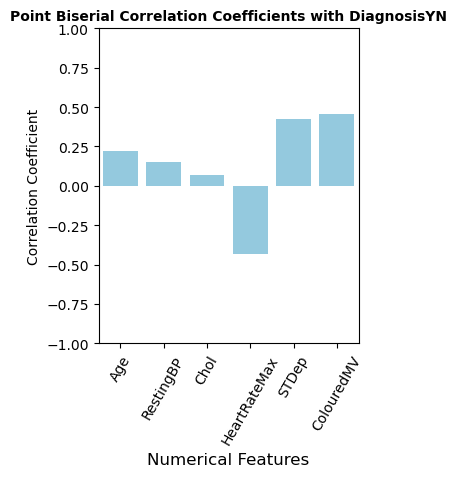

In [88]:
# Visualize the point biserial correlation coefficients with a bar plot
plt.figure(figsize=(4, 5))

# Create a bar plot for the correlation coefficients of each numerical feature with DiagnosisYN
sns.barplot(
    x=df_pointbi["Variable"],  # Numerical features
    y=df_pointbi["Correlation"],  # Correlation coefficients
    color='skyblue',  # Bar color
    data=df_pointbi  # Data for the plot
)

# Set the title for the plot
plt.title("Point Biserial Correlation Coefficients with DiagnosisYN", fontsize=10, fontweight='bold')

# Set the x-axis label and adjust the font size
plt.xlabel('Numerical Features', fontsize=12)

# Rotate the x-axis labels to avoid overlap and adjust the font size
plt.xticks(rotation=60, fontsize=10)

# Set y-axis limits to ensure the correlation coefficients are within the range [-1, 1]
plt.ylim(-1, 1)

# Adjust the layout for better spacing
plt.subplots_adjust(left=0.25, bottom=0.25)

# Set the y-axis label for correlation coefficients
plt.ylabel('Correlation Coefficient', fontsize=10)

# Display the plot
plt.show()

#### PairGrid Visualisation

This code creates a PairGrid visualisation to explore relationships between continuous numerical variables in the dataset. The grid displays histograms for individual variables and scatter plots for pairwise comparisons, with the colour representing whether the patient has heart disease (DiagnosisYN).

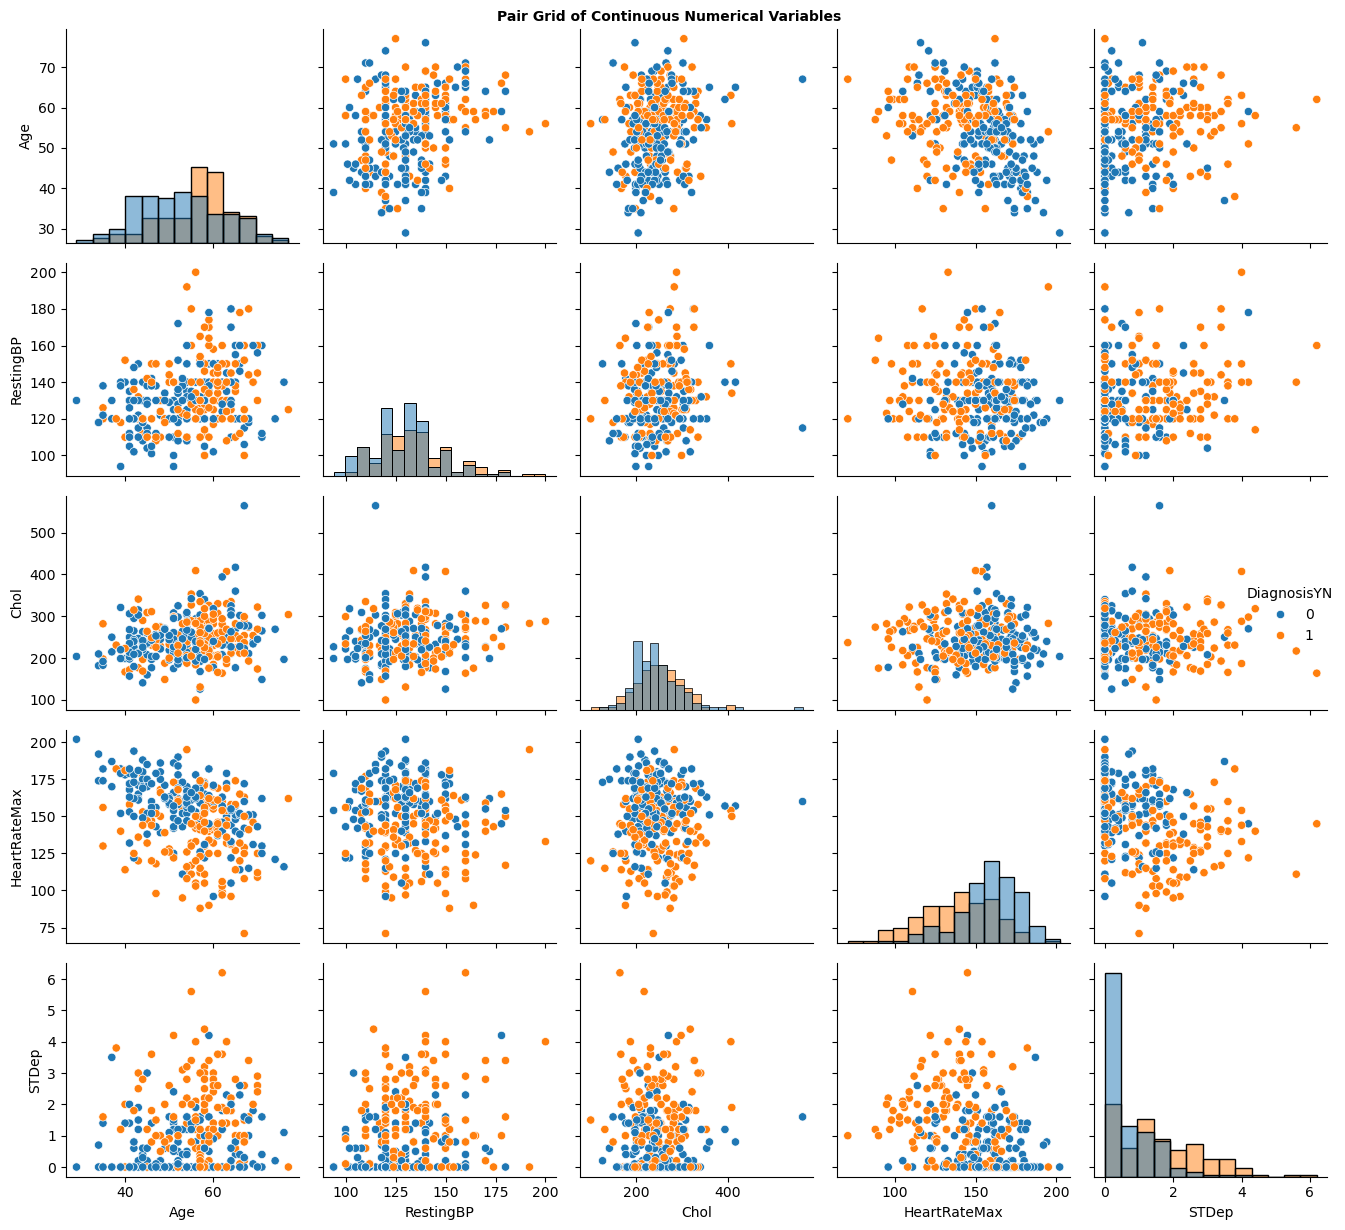

In [91]:
# Create a PairGrid for continuous numerical variables, excluding "ColouredMV"
ax = sns.PairGrid(
    df_combined.drop(["ColouredMV"], axis=1),  # Drop "ColouredMV" column
    hue="DiagnosisYN",  # Colour by DiagnosisYN
    hue_order=[0, 1]    # Ensure correct order for hue (No = 0, Yes = 1)
)

# Apply histograms to diagonal elements (individual variable distributions)
ax.map_diag(sns.histplot)

# Apply scatter plots to off-diagonal elements (pairwise comparisons)
ax.map_offdiag(sns.scatterplot)

# Add legend and set title
ax.add_legend()
ax.fig.suptitle("Pair Grid of Continuous Numerical Variables", fontsize=10, fontweight='bold')

# Adjust layout to prevent overlap and clipping
plt.subplots_adjust(top=0.95)
plt.tight_layout()  # Ensure elements fit well into the plot area

plt.show()

#### Chi-squared test

This code calculates the Chi-squared test for each categorical variable against the DiagnosisYN variable (heart disease diagnosis). The test checks whether there is a significant association between categorical variables and heart disease diagnosis. The results are stored and displayed in a DataFrame.

In [93]:
# Convert 'ColouredMV' to a categorical variable with ordered categories
# The column 'ColouredMV' contains multiple values, and we want to treat it as a categorical variable with specific order.
df_combined["ColouredMVCat"] = pd.Categorical(df_combined["ColouredMV"], categories=[0, 1, 2, 3], ordered=True)

# Check the dtype of the new categorical column to verify the conversion
print(df_combined["ColouredMVCat"].dtype)  # This will print the dtype to confirm the conversion

category


In [94]:
# List of categorical variables to check against DiagnosisYN
columns_for_chi = [
    "Sex", 
    "ChestPain", 
    "FastingBS", 
    "RestingECG", 
    "ExeAngina", 
    "STSlope", 
    "Thalass", 
    "ColouredMVCat"
]

chi_list = []

# Loop through each categorical variable and perform the Chi-squared test
for cat in columns_for_chi:
    # Create a contingency table for the categorical variable vs DiagnosisYN
    contingency_table = pd.crosstab(df_combined[cat], df_combined['DiagnosisYN'])
    
    # Perform the Chi-squared test
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Output the results with formatted p-value
    print(f"For {cat}:")
    print(f"Chi-squared statistic: {chi2:.4f}")
    print(f"P-value: {p:.4f}")
    print(f"Degrees of freedom: {dof}")
    print(f"Expected frequencies:\n{expected}")
    
    # Interpretation based on p-value
    if p < 0.05:
        print("The result is statistically significant (reject the null hypothesis).\n")
    else:
        print("The result is not statistically significant (fail to reject the null hypothesis).\n")
    
    # Append the results to the list
    chi_list.append([cat, chi2, dof, p])

# Display the results in a DataFrame
df_chi = pd.DataFrame(chi_list, columns=["Variable", "Chi-squared", "Degrees of Freedom", "P-value"])
df_chi.style.hide(axis="index")

For Sex:
Chi-squared statistic: 22.5676
P-value: 0.0000
Degrees of freedom: 1
Expected frequencies:
[[ 51.37123746  44.62876254]
 [108.62876254  94.37123746]]
The result is statistically significant (reject the null hypothesis).

For ChestPain:
Chi-squared statistic: 78.9128
P-value: 0.0000
Degrees of freedom: 3
Expected frequencies:
[[12.30769231 10.69230769]
 [26.22073579 22.77926421]
 [44.41471572 38.58528428]
 [77.05685619 66.94314381]]
The result is statistically significant (reject the null hypothesis).

For FastingBS:
Chi-squared statistic: 0.0000
P-value: 1.0000
Degrees of freedom: 1
Expected frequencies:
[[136.98996656 119.01003344]
 [ 23.01003344  19.98996656]]
The result is not statistically significant (fail to reject the null hypothesis).

For RestingECG:
Chi-squared statistic: 8.7762
P-value: 0.0124
Degrees of freedom: 2
Expected frequencies:
[[79.73244147 69.26755853]
 [ 2.14046823  1.85953177]
 [78.1270903  67.8729097 ]]
The result is statistically significant (reject t

Variable,Chi-squared,Degrees of Freedom,P-value
Sex,22.567594,1,0.000002
ChestPain,78.912789,3,0.000000
FastingBS,0.000000,1,1.000000
RestingECG,8.776153,2,0.012425
ExeAngina,52.743389,1,0.000000
STSlope,44.771628,2,0.000000
Thalass,84.254015,2,0.000000
ColouredMVCat,70.172133,3,0.000000


### 4.4 Data Exploration - Decision Tree & Naive Bayes

#### Decision Tree

Train a Decision Tree classifier on categorical variables to predict heart disease diagnosis (DiagnosisYN). The decision tree is visualised to understand how different categorical variables are used to classify patients into heart disease categories (True/False). The plot helps in interpreting the decision-making process of the model.

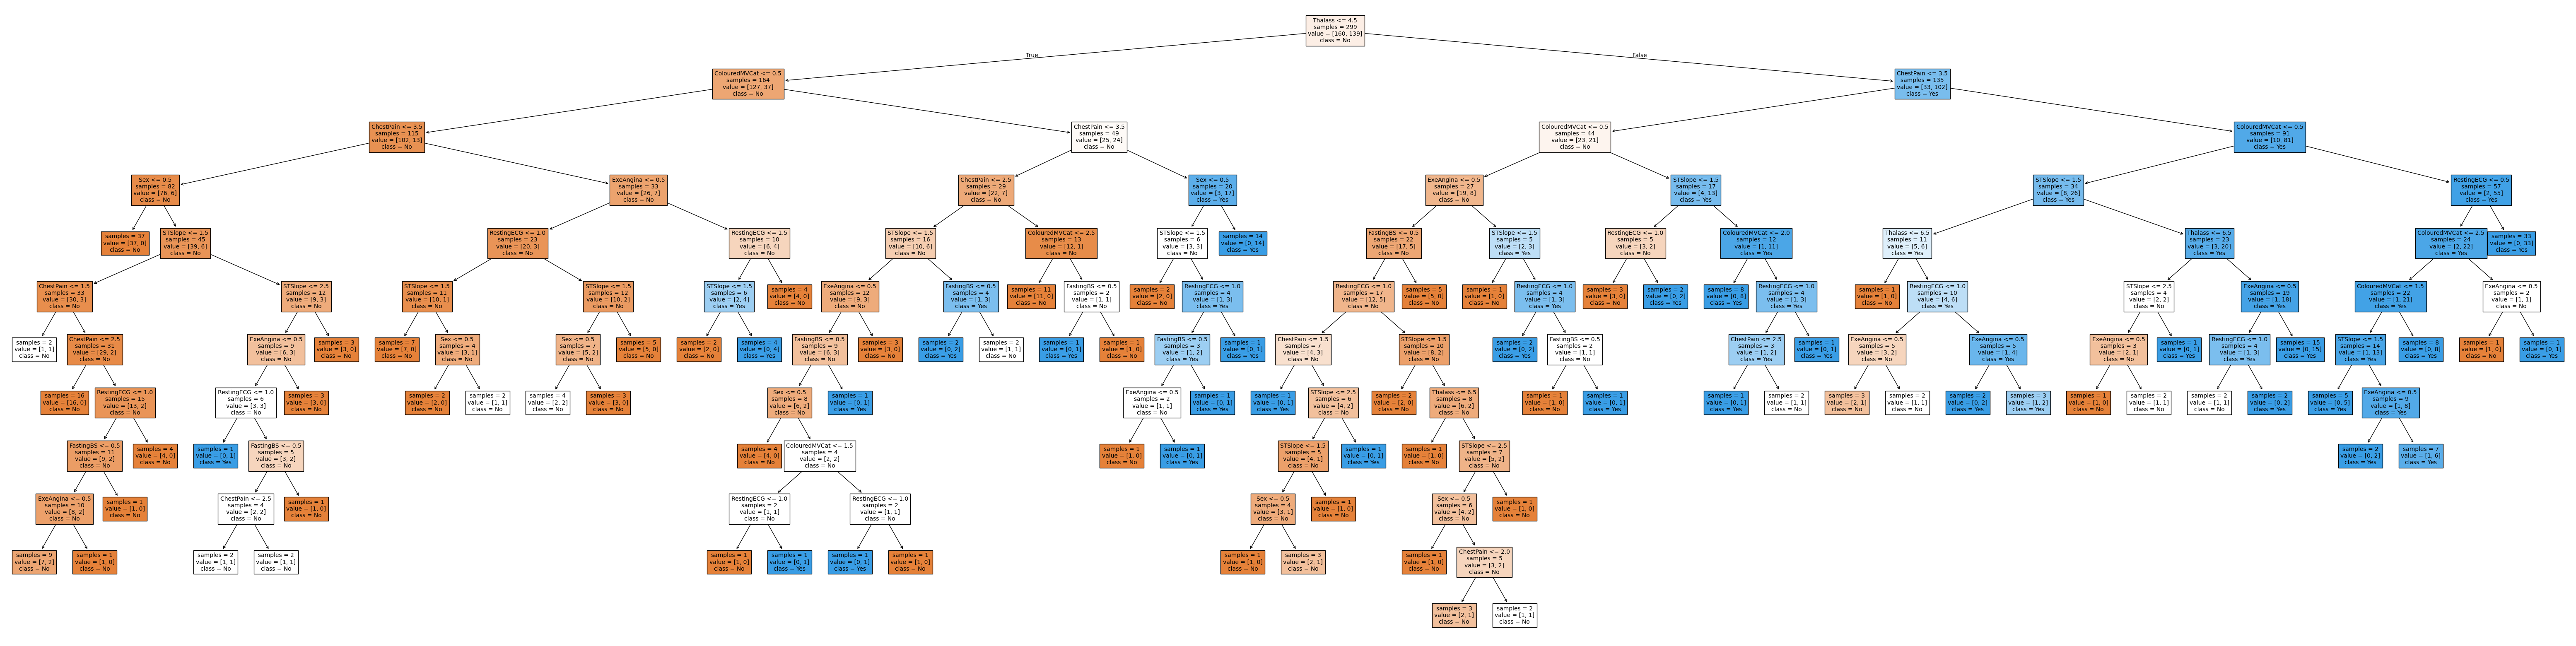

In [100]:
# List of features used for training the decision tree model
features_for_tree = [
    "Sex", 
    "ChestPain", 
    "FastingBS", 
    "RestingECG", 
    "ExeAngina", 
    "STSlope", 
    "Thalass", 
    "ColouredMVCat"
]

# Train the Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42).fit(
    X=df_combined[features_for_tree],  # Feature data
    y=df_combined["DiagnosisYN"]       # Target variable (heart disease diagnosis)
)

# Create a plot of the trained decision tree
plt.figure(figsize=(80, 20))  # Adjusted figure size for better readability

# Visualise the decision tree
plot_tree(
    clf,  # Decision tree classifier
    filled=True,  # Colour the nodes based on the majority class
    max_depth=11,  # Limit the depth for simplicity
    feature_names=features_for_tree,  # Feature names used in the model
    class_names=["No", "Yes"],  # Heart disease diagnosis (No, Yes)
    label='all',  # Display all labels (class, samples, value, etc.)
    fontsize=10,  # Font size for labels
    impurity=False  # Don't show impurity values
)

# Display the plot
plt.show()

Perform a GridSearchCV to find the optimal number of leaf nodes for a Decision Tree classifier by evaluating the model's performance across different values for max_leaf_nodes. The optimal number of leaf nodes is determined by selecting the model that achieves the highest test score. Afterward, the decision tree is visualised with the best number of leaf nodes.

Best score was 0.8393 at {'max_leaf_nodes': 7}


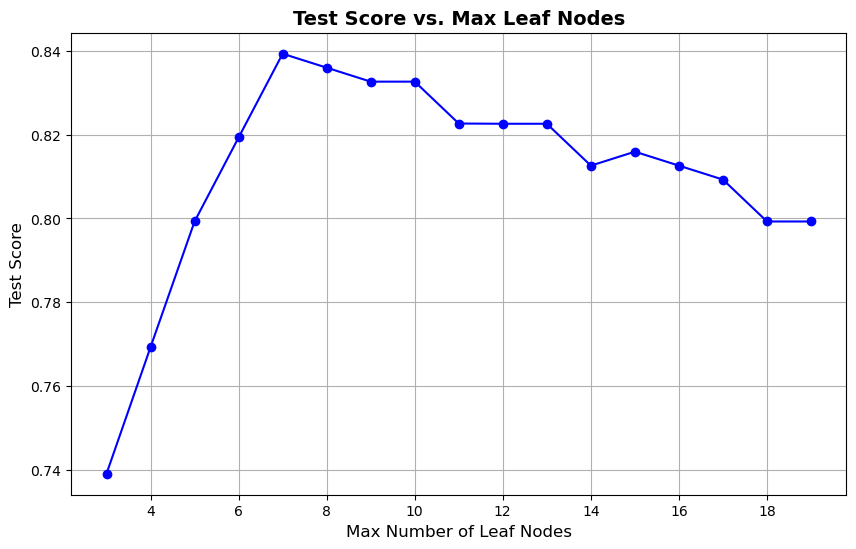

In [102]:
# Define the parameters for GridSearchCV
parameters = {'max_leaf_nodes': range(3, 20)}  # Searching for optimal number of leaf nodes

# Initialize GridSearchCV with Decision Tree classifier and defined parameters
clf = GridSearchCV(DecisionTreeClassifier(random_state=42), parameters, n_jobs=4)  # Random state for reproducibility
clf.fit(X=df_combined[features_for_tree], y=df_combined["DiagnosisYN"])

# Get the best model with the optimal leaf nodes
tree_model = clf.best_estimator_

# Print the best score and the corresponding parameters
print("Best score was {:.4f} at {}".format(clf.best_score_, clf.best_params_))

# Plot the relationship between the number of leaf nodes and test score
plt.figure(figsize=(10, 6))
plt.plot(range(3, 20), clf.cv_results_['mean_test_score'], color='b', marker='o')  # Plot mean test scores
plt.xlabel('Max Number of Leaf Nodes', fontsize=12)  # X-axis label
plt.ylabel('Test Score', fontsize=12)  # Y-axis label
plt.title('Test Score vs. Max Leaf Nodes', fontsize=14, fontweight='bold')  # Plot title
plt.grid(True)  # Add grid for better readability
plt.show()

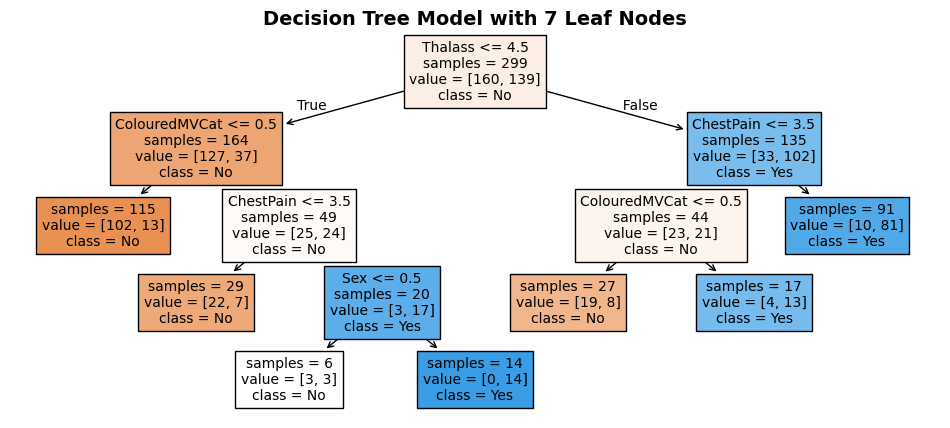

In [104]:
# Create a new decision tree with the optimal number of leaf nodes (7 in this case)
tree_model.set_params(max_leaf_nodes=7)  # Set the leaf nodes to 7 as per the model
plt.figure(figsize=(12, 5))

# Plot the decision tree with the new leaf nodes
plot_tree(
    tree_model, 
    filled=True, 
    max_depth=5, 
    feature_names=features_for_tree, 
    class_names=["No", "Yes"],
    label='all', 
    fontsize=10, 
    impurity=False
)

plt.title('Decision Tree Model with 7 Leaf Nodes', fontsize=14, fontweight='bold')  # Plot title

# Display the plot
plt.show()

#### Naive Bayes

Implement a Naive Bayes classifier using categorical data to predict the likelihood of a diagnosis. The model is evaluated on 500 random splits of the data (using different random seeds) to assess the accuracy of predictions on the test set. The accuracy scores are collected for further analysis of the model’s performance.

Mean accuracy: 57.19%
Standard deviation of accuracy: 5.89%


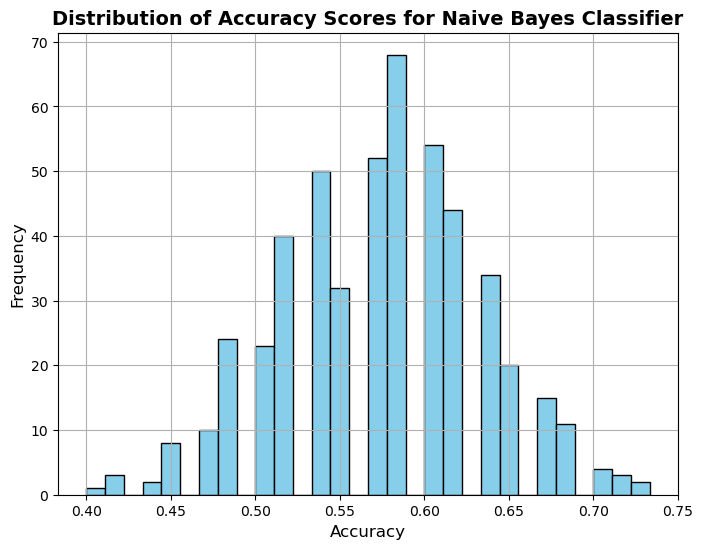

In [107]:
# Split into features for Naive Bayes classifier
columns_for_nb = [
    "Sex",
    "ChestPain",
    "FastingBS",
    "RestingECG",
    "ExeAngina",
    "STSlope",
    "Thalass",
    "ColouredMVCat"
]

X = df_combined[columns_for_nb]  # Feature variables
y = df_combined["Diagnosis"]     # Target variable

scores = []  # List to store accuracy scores

# Loop for 500 random splits to evaluate accuracy
for seed in range(1, 501):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
    
    # Initialize and train the Naive Bayes classifier
    model = CategoricalNB()
    model.fit(X_train, y_train)
    
    # Predict on the test set and calculate accuracy
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    
    # Append the accuracy score to the list
    scores.append(score)

# Convert the list of scores to a numpy array for easier analysis
scores = np.array(scores)

# Print the summary statistics of the accuracy scores
print(f"Mean accuracy: {scores.mean() * 100:.2f}%")
print(f"Standard deviation of accuracy: {scores.std() * 100:.2f}%")

# Optionally: plot the distribution of accuracy scores
plt.figure(figsize=(8, 6))
plt.hist(scores, bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Accuracy Scores for Naive Bayes Classifier", fontsize=14, fontweight='bold')
plt.xlabel('Accuracy', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

Visualises the distribution of these scores using a box plot, which displays the spread of accuracy scores along with the mean. This helps assess the consistency of the classifier's performance across multiple random seeds.

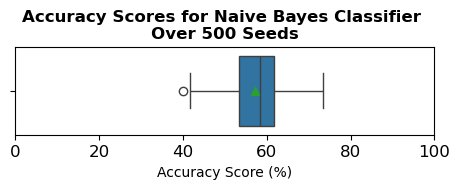

In [111]:
# Store accuracy scores in a DataFrame and convert to percentage
accuracy_scores_df = pd.DataFrame(scores, columns=["Score"])
accuracy_scores_df["Score"] = accuracy_scores_df["Score"] * 100  # Convert to percentage

# Display the DataFrame with accuracy scores
accuracy_scores_df

# Create the box plot for accuracy scores
plt.figure(figsize=(5, 2))  # Slightly larger figure for better readability
ax = sns.boxplot(
    x=accuracy_scores_df["Score"],
    showmeans=True
)

# Set title and labels
plt.title("Accuracy Scores for Naive Bayes Classifier \nOver 500 Seeds", fontsize=12, fontweight='bold')
plt.xlabel("Accuracy Score (%)", fontsize=10)  # Clarify that this is in percentage
plt.xlim(0, 100)  # Set x-axis limits to 0-100 for percentage scale

# Improve axis labels and ticks
plt.xticks(fontsize=12)
plt.tight_layout()  # Adjust layout to avoid clipping
plt.subplots_adjust(left=0.1)  # Adjust left margin for aesthetics

# Remove the legend, since it's not needed
plt.legend([],[], frameon=False)

# Show the plot
plt.show()

### 4.4 Data Exploration - Logistic Regression

#### Logit

Fit a logistic regression model using statsmodels to assess the significance of various features in predicting the likelihood of heart disease. The model evaluates multiple predictors, including both continuous and categorical variables. The coefficients, p-values, and confidence intervals are extracted and stored in a DataFrame.

In [112]:
# Convert DiagnosisYN to integer (binary)
df_combined["DiagnosisYNInt"] = df_combined["DiagnosisYN"].astype("int64")

# Define the logistic regression formula
formula = """
DiagnosisYNInt ~ 
Age + 
C(Sex) + 
C(ChestPain) + 
RestingBP + 
Chol + 
C(FastingBS) + 
C(RestingECG) + 
HeartRateMax + 
C(ExeAngina) + 
STDep + 
C(STSlope) + 
ColouredMV + 
C(Thalass)
"""

# Fit the logistic regression model
mod_2 = smf.logit(formula, data=df_combined)
res_2 = mod_2.fit()

# Display the summary of the model
print(res_2.summary())

# Extract coefficients, p-values, and confidence intervals
coefficients = res_2.params
p_values = res_2.pvalues
conf_int = res_2.conf_int()

# Create a DataFrame for results
results_df = pd.DataFrame({
    "Coefficient": coefficients,
    "P-Value": p_values,
    "Conf_Int_Lower": conf_int[0],
    "Conf_Int_Upper": conf_int[1],
})

Optimization terminated successfully.
         Current function value: 0.321016
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:         DiagnosisYNInt   No. Observations:                  299
Model:                          Logit   Df Residuals:                      280
Method:                           MLE   Df Model:                           18
Date:                Wed, 29 Jan 2025   Pseudo R-squ.:                  0.5352
Time:                        00:54:36   Log-Likelihood:                -95.984
converged:                       True   LL-Null:                       -206.51
Covariance Type:            nonrobust   LLR p-value:                 5.920e-37
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -5.9466      2.889     -2.058      0.040     -11.609      -0.284
C(Sex

The categorical features are transformed into binary groups (0 or 1) to facilitate the analysis. A logistic regression model is then fitted using these transformed features and continuous variables. The results, including coefficients, p-values, and confidence intervals, are displayed.

In [113]:
# Transform categorical features into binary groups based on specific thresholds
df_combined["ChestPainGroup"] = np.where(df_combined["ChestPain"].isin([1, 2, 3]), 0, 1)
df_combined["ChestPainGroup"] = pd.Categorical(df_combined["ChestPainGroup"], categories=[0, 1], ordered=False)

df_combined["RestingECGGroup"] = np.where(df_combined["RestingECG"].isin([0]), 0, 1)
df_combined["RestingECGGroup"] = pd.Categorical(df_combined["RestingECGGroup"], categories=[0, 1], ordered=False)

df_combined["ThalassGroup"] = np.where(df_combined["Thalass"].isin([3, 6]), 0, 1)
df_combined["ThalassGroup"] = pd.Categorical(df_combined["ThalassGroup"], categories=[0, 1], ordered=False)

df_combined["ColouredMVGroup"] = np.where(df_combined["ColouredMV"].isin([0]), 0, 1)
df_combined["ColouredMVGroup"] = pd.Categorical(df_combined["ColouredMVGroup"], categories=[0, 1], ordered=False)

df_combined["STSlopeGroup"] = np.where(df_combined["STSlope"].isin([2]), 0, 1)
df_combined["STSlopeGroup"] = pd.Categorical(df_combined["STSlopeGroup"], categories=[0, 1], ordered=False)

# Define the logistic regression formula with transformed binary features
formula = """
DiagnosisYNInt ~ 
Age + 
C(Sex) + 
C(ChestPainGroup) + 
RestingBP + 
Chol + 
HeartRateMax + 
C(ExeAngina) + 
STDep + 
C(STSlopeGroup) + 
C(ColouredMVGroup) + 
C(ThalassGroup)
"""

# Fit the logistic regression model
mod_2 = smf.logit(formula, data=df_combined)
res_2 = mod_2.fit()

# Display the summary of the model
print(res_2.summary())

# Extract coefficients, p-values, and confidence intervals
coefficients = res_2.params
p_values = res_2.pvalues
conf_int = res_2.conf_int()

# Create a DataFrame for results
results_df = pd.DataFrame({
    "Coefficient": coefficients,
    "P-Value": p_values,
    "Conf_Int_Lower": conf_int[0],  # Lower bound of confidence interval
    "Conf_Int_Upper": conf_int[1],  # Upper bound of confidence interval
})

Optimization terminated successfully.
         Current function value: 0.320874
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:         DiagnosisYNInt   No. Observations:                  299
Model:                          Logit   Df Residuals:                      287
Method:                           MLE   Df Model:                           11
Date:                Wed, 29 Jan 2025   Pseudo R-squ.:                  0.5354
Time:                        00:55:56   Log-Likelihood:                -95.941
converged:                       True   LL-Null:                       -206.51
Covariance Type:            nonrobust   LLR p-value:                 2.984e-41
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -4.3178      2.586     -1.670      0.095      -9.387   

## 5. SVM Model

### 5.1 Creating Dummy Variables

In this section, we create dummy variables for the features that will be used in a Support Vector Classifier (SVC) model. This includes converting categorical variables into binary features using one-hot encoding, removing unnecessary columns, and converting the data types to ensure compatibility with the SVC model. The result is a cleaned and processed dataset ready for model training.

In [119]:
# Check the data types to see which columns require conversion
df_combined.dtypes

Age                   int64
Sex                category
ChestPain          category
RestingBP             int64
Chol                  int64
FastingBS          category
RestingECG         category
HeartRateMax          int64
ExeAngina          category
STDep               float64
STSlope            category
ColouredMV            int64
Thalass            category
Diagnosis          category
Location             object
SexMF              category
DiagnosisYN        category
ColouredMVCat      category
DiagnosisYNInt        int64
ChestPainGroup     category
RestingECGGroup    category
ThalassGroup       category
ColouredMVGroup    category
STSlopeGroup       category
dtype: object

In [120]:

# Create dummy variables for categorical features and drop unnecessary columns
df_combined_svc = pd.get_dummies(df_combined, columns=[
    "ChestPain", 
    "RestingECG", 
    "STSlope", 
    "ColouredMVCat", 
    "Thalass"
], drop_first=False)

# Drop columns that are not needed for the model
df_combined_svc = df_combined_svc.drop(columns=[
    "SexMF",  # Dropped as we will treat Sex as binary (0/1)
    "DiagnosisYNInt",  # This column is redundant with DiagnosisYN
    "ChestPainGroup",  # Grouped versions of ChestPain not needed
    "RestingECGGroup",  # Similar to ChestPainGroup, not required
    "ThalassGroup",  # Grouped version of Thalass not required
    "ColouredMVGroup",  # Grouped version of ColouredMV not needed
    "STSlopeGroup",  # Grouped version of Slope not necessary
    "Diagnosis"  # This is the target, which will be kept separately in y
])

# Convert relevant columns to appropriate data types for SVC model
df_combined_svc = df_combined_svc.astype({
    "Age": "int64",
    "Sex": "bool",  # Sex is binary (0 or 1)
    "RestingBP": "int64",
    "Chol": "int64",
    "FastingBS": "bool",  # FastingBS is binary
    "HeartRateMax": "int64",
    "ExeAngina": "bool",  # ExeAngina is binary
    "STDep": "float64",
    "DiagnosisYN": "bool"  # Target variable is binary (0 or 1)
})

# Confirm the changes in data types
df_combined_svc.dtypes

Age                  int64
Sex                   bool
RestingBP            int64
Chol                 int64
FastingBS             bool
HeartRateMax         int64
ExeAngina             bool
STDep              float64
ColouredMV           int64
Location            object
DiagnosisYN           bool
ChestPain_1           bool
ChestPain_2           bool
ChestPain_3           bool
ChestPain_4           bool
RestingECG_0          bool
RestingECG_1          bool
RestingECG_2          bool
STSlope_1             bool
STSlope_2             bool
STSlope_3             bool
ColouredMVCat_0       bool
ColouredMVCat_1       bool
ColouredMVCat_2       bool
ColouredMVCat_3       bool
Thalass_3             bool
Thalass_6             bool
Thalass_7             bool
dtype: object

In [122]:
# List of all features for the SVC model
all_svc_features = [
    'Age',
    'Sex',
    'ChestPain_1',
    'ChestPain_2',
    'ChestPain_3',
    'ChestPain_4',
    'RestingBP',
    'Chol',
    'FastingBS',
    'RestingECG_0',
    'RestingECG_1',
    'RestingECG_2',
    'HeartRateMax',
    'ExeAngina',
    'STDep',
    'STSlope_1',
    'STSlope_2',
    'STSlope_3',
    'ColouredMVCat_0',
    'ColouredMVCat_1',
    'ColouredMVCat_2',
    'ColouredMVCat_3',
    'Thalass_3',
    'Thalass_6',
    'Thalass_7',
]

### 5.2 Linear vs. RBF vs. Poly // Unscaled

In this section, we compare the performance of three different SVC kernel types (Linear, RBF, and Poly) without scaling the features. We start by implementing the model with a linear kernel, training it on the selected features, and calculating the accuracy. The accuracy scores are recorded for each seed value (from 1 to 100) to observe the stability of the model's performance. Afterward, we will compare these results to the other kernel types.

In [129]:
# Define a function to train and evaluate the model for a given kernel type
def evaluate_svc_kernel(kernel_type, X, y, n_runs=100):
    accuracy_list = []
    for seed in range(1, n_runs + 1):
        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
        
        # SVC model with the specified kernel
        model = SVC(kernel=kernel_type)
        
        # Train the model
        model.fit(X_train, y_train)
        
        # Predict the labels for the test set
        y_pred = model.predict(X_test)
       
        # Calculate the accuracy score
        accuracy_svc = accuracy_score(y_test, y_pred)
        
        # Append the accuracy score
        accuracy_list.append(accuracy_svc)
    
    # Return the accuracy list and average accuracy
    average_acc = mean(accuracy_list)
    return accuracy_list, average_acc

# Define features and target variable
X = df_combined_svc[all_svc_features]
y = df_combined_svc["DiagnosisYN"]

# Evaluate each kernel and store results
kernels = ['linear', 'rbf', 'poly']
kernel_results = {}

for kernel in kernels:
    accuracy_list, avg_acc = evaluate_svc_kernel(kernel, X, y)
    kernel_results[kernel] = {
        'accuracy_list': accuracy_list,
        'average_accuracy': avg_acc
    }
    print(f"{kernel.capitalize()} Kernel Accuracy: {avg_acc * 100:.2f}%\n")

# Convert results into DataFrame for easy comparison
df_kernel_comparison = pd.DataFrame({
    kernel: results['accuracy_list'] for kernel, results in kernel_results.items()
})

df_kernel_comparison

Linear Kernel Accuracy: 83.17%

Rbf Kernel Accuracy: 65.73%

Poly Kernel Accuracy: 66.92%



,linear,rbf,poly
0,0.816667,0.616667,0.650000
1,0.783333,0.733333,0.750000
2,0.800000,0.683333,0.666667
3,0.866667,0.616667,0.650000
4,0.850000,0.600000,0.600000
...,...,...,...
95,0.833333,0.666667,0.666667
96,0.800000,0.650000,0.716667
97,0.883333,0.616667,0.666667
98,0.850000,0.750000,0.733333


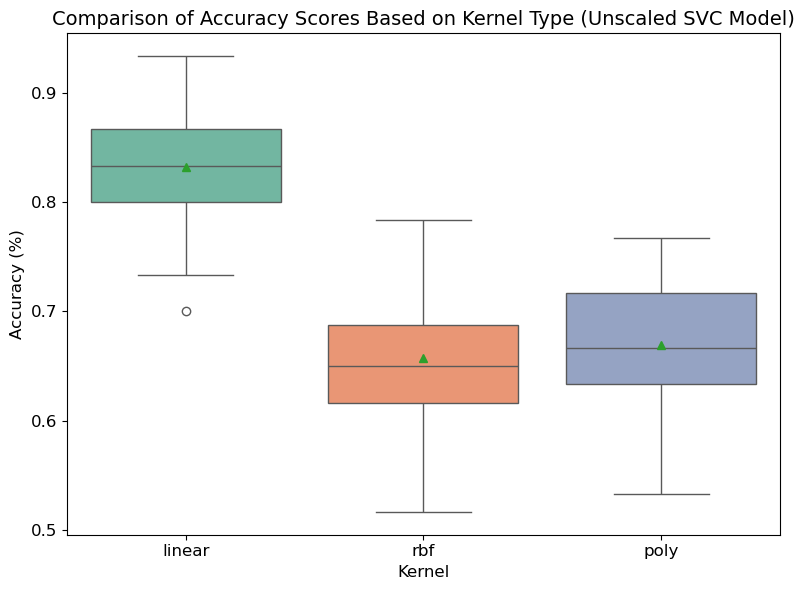

In [130]:
# Melt the DataFrame to prepare for plotting
df_kernel_comparison_melted = pd.melt(df_kernel_comparison)
df_kernel_comparison_melted.columns = ["Kernel", "AccuracyScore"]

# Create the boxplot for visual comparison
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_kernel_comparison_melted, x="Kernel", y="AccuracyScore", palette="Set2", hue="Kernel", showmeans=True)
plt.title("Comparison of Accuracy Scores Based on Kernel Type (Unscaled SVC Model)", fontsize=14)
plt.xlabel("Kernel", fontsize=12)
plt.ylabel("Accuracy (%)", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Show plot
plt.show()

### 5.3 Linear vs. RBF vs. Poly // Scaled

We now compare the performance of three different SVC kernel types (Linear, RBF, and Poly) when scaling the features.

In [131]:
# Define a function to train and evaluate the SVC model with a specified kernel type and scaling
def evaluate_svc_kernel_scaled(kernel_type, X, y, n_runs=100):
    accuracy_list = []
    for seed in range(1, n_runs + 1):
        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

        # Standardize the features using StandardScaler
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        # Initialize and train the SVC model
        model = SVC(kernel=kernel_type)
        model.fit(X_train_scaled, y_train)
        
        # Predict the labels for the test set and calculate accuracy
        y_pred = model.predict(X_test_scaled)
        accuracy_svc = accuracy_score(y_test, y_pred)
        
        # Append the accuracy score
        accuracy_list.append(accuracy_svc)
    
    # Return the accuracy list and average accuracy
    average_acc = mean(accuracy_list)
    return accuracy_list, average_acc

# Define features and target variable
X = df_combined_svc[all_svc_features]
y = df_combined_svc["DiagnosisYN"]

# Evaluate each kernel with scaling and store results
kernels = ['linear', 'rbf', 'poly']
kernel_results_scaled = {}

for kernel in kernels:
    accuracy_list, avg_acc = evaluate_svc_kernel_scaled(kernel, X, y)
    kernel_results_scaled[kernel] = {
        'accuracy_list': accuracy_list,
        'average_accuracy': avg_acc
    }
    print(f"{kernel.capitalize()} Kernel (Scaled) Accuracy: {avg_acc * 100:.2f}%\n")

# Convert results into DataFrame for easy comparison
df_kernel_comparison_scaled = pd.DataFrame({
    kernel: results['accuracy_list'] for kernel, results in kernel_results_scaled.items()
})

df_kernel_comparison_scaled

Linear Kernel (Scaled) Accuracy: 83.08%

Rbf Kernel (Scaled) Accuracy: 82.60%

Poly Kernel (Scaled) Accuracy: 81.18%



,linear,rbf,poly
0,0.816667,0.800000,0.816667
1,0.750000,0.783333,0.750000
2,0.833333,0.800000,0.800000
3,0.866667,0.850000,0.850000
4,0.850000,0.850000,0.800000
...,...,...,...
95,0.866667,0.866667,0.883333
96,0.816667,0.783333,0.783333
97,0.866667,0.850000,0.783333
98,0.866667,0.850000,0.850000


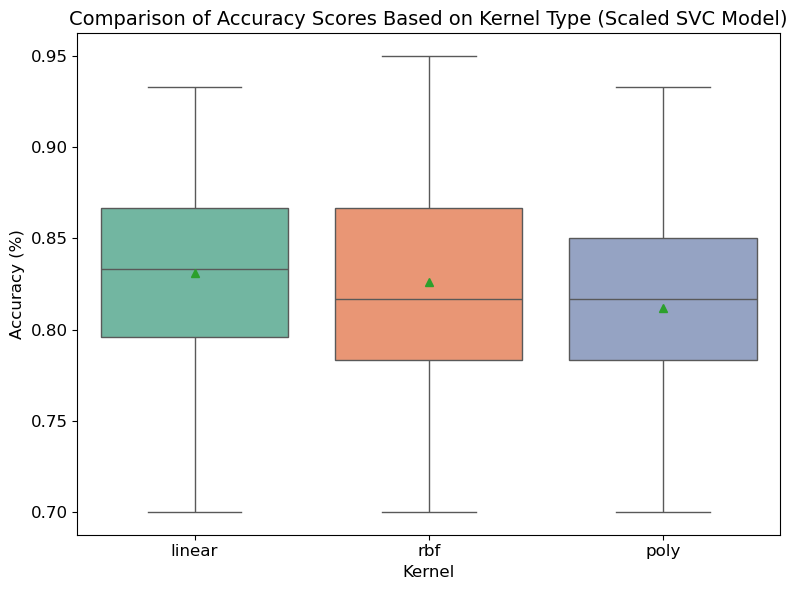

In [132]:
# Melt the DataFrame to prepare for plotting
df_kernel_comparison_scaled_melted = pd.melt(df_kernel_comparison_scaled)
df_kernel_comparison_scaled_melted.columns = ["Kernel", "AccuracyScore"]

# Create the boxplot for visual comparison
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_kernel_comparison_scaled_melted, x="Kernel", y="AccuracyScore", palette="Set2", hue="Kernel", showmeans=True)
plt.title("Comparison of Accuracy Scores Based on Kernel Type (Scaled SVC Model)", fontsize=14)
plt.xlabel("Kernel", fontsize=12)
plt.ylabel("Accuracy (%)", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Show plot
plt.show()

### 5.4 Linear vs. RBF vs. Poly // Scaled // Reduced Variables

We now compare the performance of three different SVC kernel types (Linear, RBF, and Poly) when scaling the features and using a reduced set of variables.

In [133]:
# Function to train and evaluate the SVC model with a specified kernel and scaling
def evaluate_svc_kernel_scaled_reduced(kernel_type, X, y, n_runs=100):
    accuracy_list = []
    for seed in range(1, n_runs + 1):
        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

        # Standardize the features using StandardScaler
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        # Initialize and train the SVC model
        model = SVC(kernel=kernel_type)
        model.fit(X_train_scaled, y_train)
        
        # Predict the labels for the test set and calculate accuracy
        y_pred = model.predict(X_test_scaled)
        accuracy_svc = accuracy_score(y_test, y_pred)
        
        # Append the accuracy score
        accuracy_list.append(accuracy_svc)
    
    # Return the accuracy list and average accuracy
    average_acc = mean(accuracy_list)
    return accuracy_list, average_acc

# Define the reduced features and target variable
reduced_svc_features = [
    'Age', 'Sex', 'ChestPain_2', 'ChestPain_4', 'RestingBP', 'Chol', 'HeartRateMax',
    'ExeAngina', 'STDep', 'STSlope_2', 'ColouredMVCat_0', 'ColouredMVCat_1', 'ColouredMVCat_2',
    'ColouredMVCat_3', 'Thalass_3', 'Thalass_7'
]

X = df_combined_svc[reduced_svc_features]
y = df_combined_svc["DiagnosisYN"]

# Evaluate each kernel with scaling and store results
kernels = ['linear', 'rbf', 'poly']
kernel_results_scaled_reduced = {}

for kernel in kernels:
    accuracy_list, avg_acc = evaluate_svc_kernel_scaled_reduced(kernel, X, y)
    kernel_results_scaled_reduced[kernel] = {
        'accuracy_list': accuracy_list,
        'average_accuracy': avg_acc
    }
    print(f"{kernel.capitalize()} Kernel (Scaled) Accuracy: {avg_acc * 100:.2f}%\n")

# Convert results into DataFrame for easy comparison
df_kernel_comparison_scaled_reduced = pd.DataFrame({
    kernel: results['accuracy_list'] for kernel, results in kernel_results_scaled_reduced.items()
})

df_kernel_comparison_scaled_reduced

Linear Kernel (Scaled) Accuracy: 84.37%

Rbf Kernel (Scaled) Accuracy: 83.77%

Poly Kernel (Scaled) Accuracy: 83.67%



,linear,rbf,poly
0,0.800000,0.816667,0.883333
1,0.800000,0.816667,0.800000
2,0.816667,0.733333,0.800000
3,0.866667,0.883333,0.883333
4,0.850000,0.816667,0.816667
...,...,...,...
95,0.866667,0.800000,0.850000
96,0.816667,0.800000,0.783333
97,0.883333,0.883333,0.816667
98,0.866667,0.866667,0.883333


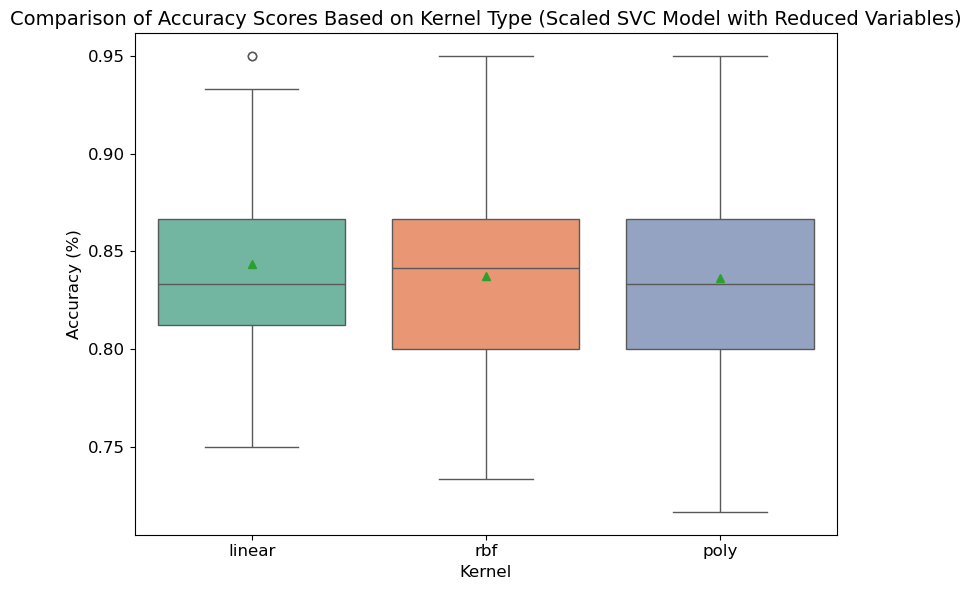

In [134]:
# Melt the DataFrame to prepare for plotting
df_kernel_comparison_scaled_reduced_melted = pd.melt(df_kernel_comparison_scaled_reduced)
df_kernel_comparison_scaled_reduced_melted.columns = ["Kernel", "AccuracyScore"]

# Create the boxplot for visual comparison
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_kernel_comparison_scaled_reduced_melted, x="Kernel", y="AccuracyScore", palette="Set2", hue="Kernel", showmeans=True)
plt.title("Comparison of Accuracy Scores Based on Kernel Type (Scaled SVC Model with Reduced Variables)", fontsize=14)
plt.xlabel("Kernel", fontsize=12)
plt.ylabel("Accuracy (%)", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Show plot
plt.show()

### 5.5. Linear vs. RBF vs. Poly // Scaled // Reduced Variables // Balanced

To handle any class imbalance, a balanced approach is applied during cross-validation to ensure that each class is equally represented in the training and testing splits. This comparison helps assess how each kernel type performs under these conditions and which is the most effective for the given dataset.

In [135]:
# Function to evaluate SVC with balanced class weights and scaling
def evaluate_svc_kernel_balanced_scaled(kernel_type, X, y, n_runs=100):
    accuracy_list = []
    for seed in range(1, n_runs + 1):
        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

        # Standardize the features using StandardScaler
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        # Initialize and train the SVC model with class weight balancing
        model = SVC(kernel=kernel_type, class_weight='balanced')
        model.fit(X_train_scaled, y_train)
        
        # Predict the labels for the test set and calculate accuracy
        y_pred = model.predict(X_test_scaled)
        accuracy_svc = accuracy_score(y_test, y_pred)
        
        # Append the accuracy score
        accuracy_list.append(accuracy_svc)
    
    # Return the accuracy list and average accuracy
    average_acc = mean(accuracy_list)
    return accuracy_list, average_acc

# Define the reduced features and target variable
reduced_svc_features = [
    'Age', 'Sex', 'ChestPain_2', 'ChestPain_4', 'RestingBP', 'Chol', 'HeartRateMax',
    'ExeAngina', 'STDep', 'STSlope_2', 'ColouredMVCat_0', 'ColouredMVCat_1', 'ColouredMVCat_2',
    'ColouredMVCat_3', 'Thalass_3', 'Thalass_7'
]

X = df_combined_svc[reduced_svc_features]
y = df_combined_svc["DiagnosisYN"]

# Evaluate each kernel with scaling and class balancing
kernels = ['linear', 'rbf', 'poly']
kernel_results_balanced_scaled = {}

for kernel in kernels:
    accuracy_list, avg_acc = evaluate_svc_kernel_balanced_scaled(kernel, X, y)
    kernel_results_balanced_scaled[kernel] = {
        'accuracy_list': accuracy_list,
        'average_accuracy': avg_acc
    }
    print(f"{kernel.capitalize()} Kernel (Balanced, Scaled) Accuracy: {avg_acc * 100:.2f}%\n")

# Convert results into DataFrame for easy comparison
df_kernel_comparison_balanced_scaled = pd.DataFrame({
    kernel: results['accuracy_list'] for kernel, results in kernel_results_balanced_scaled.items()
})

df_kernel_comparison_balanced_scaled

Linear Kernel (Balanced, Scaled) Accuracy: 84.30%

Rbf Kernel (Balanced, Scaled) Accuracy: 83.45%

Poly Kernel (Balanced, Scaled) Accuracy: 83.77%



,linear,rbf,poly
0,0.800000,0.816667,0.883333
1,0.800000,0.800000,0.816667
2,0.800000,0.783333,0.783333
3,0.866667,0.850000,0.850000
4,0.850000,0.833333,0.833333
...,...,...,...
95,0.866667,0.833333,0.850000
96,0.816667,0.800000,0.783333
97,0.883333,0.883333,0.833333
98,0.866667,0.866667,0.900000


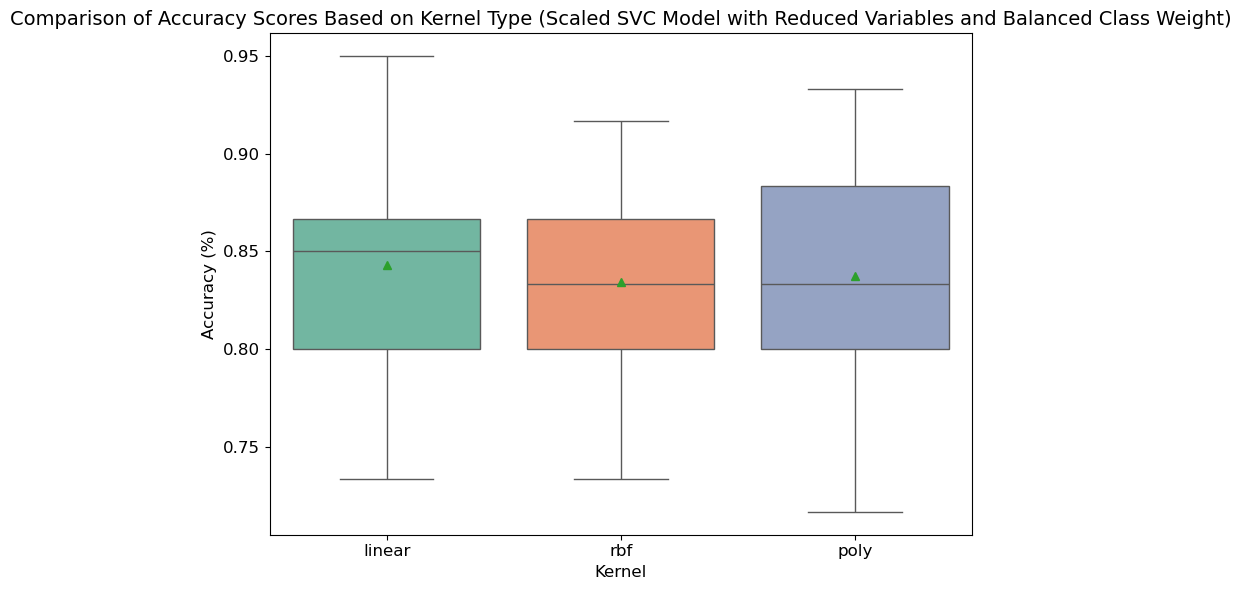

In [136]:
# Melt the DataFrame to prepare for plotting
df_kernel_comparison_balanced_scaled_melted = pd.melt(df_kernel_comparison_balanced_scaled)
df_kernel_comparison_balanced_scaled_melted.columns = ["Kernel", "AccuracyScore"]

# Create the boxplot for visual comparison
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_kernel_comparison_balanced_scaled_melted, x="Kernel", y="AccuracyScore", palette="Set2", hue="Kernel", showmeans=True)
plt.title("Comparison of Accuracy Scores Based on Kernel Type (Scaled SVC Model with Reduced Variables and Balanced Class Weight)", fontsize=14)
plt.xlabel("Kernel", fontsize=12)
plt.ylabel("Accuracy (%)", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Show plot
plt.show()

### 5.6 Linear vs. RBF vs. Poly // Scaled // Reduced Variables // StratKFold

We use Stratified K-Fold cross-validation, which preserves the proportion of each class in each fold, making the results more reliable.

In [137]:
# Function to evaluate SVC kernels with StratifiedKFold cross-validation
def evaluate_svc_kernel_stratified_kfold(kernel_type, X, y, n_splits=5, n_runs=100):
    accuracy_list = []
    
    # Create a pipeline for scaling and SVC model
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', SVC(kernel=kernel_type))
    ])
    
    for seed in range(1, n_runs + 1):
        # StratifiedKFold for preserving class distribution in splits
        skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=seed)

        # Perform cross-validation on the pipeline
        accuracy_score = cross_val_score(pipeline, X, y, cv=skf, scoring='accuracy')

        # Append the mean accuracy score from each fold
        accuracy_list.append(accuracy_score.mean())

    # Return the accuracy list and average accuracy
    average_acc = mean(accuracy_list)
    return accuracy_list, average_acc

# Define the reduced features and target variable
reduced_svc_features = [
    'Age', 'Sex', 'ChestPain_2', 'ChestPain_4', 'RestingBP', 'Chol', 'HeartRateMax',
    'ExeAngina', 'STDep', 'STSlope_2', 'ColouredMVCat_0', 'ColouredMVCat_1', 'ColouredMVCat_2',
    'ColouredMVCat_3', 'Thalass_3', 'Thalass_7'
]

X = df_combined_svc[reduced_svc_features]
y = df_combined_svc["DiagnosisYN"]

# Evaluate each kernel with StratifiedKFold cross-validation
kernels = ['linear', 'rbf', 'poly']
kernel_results_stratified_kfold = {}

for kernel in kernels:
    accuracy_list, avg_acc = evaluate_svc_kernel_stratified_kfold(kernel, X, y)
    kernel_results_stratified_kfold[kernel] = {
        'accuracy_list': accuracy_list,
        'average_accuracy': avg_acc
    }
    print(f"{kernel.capitalize()} Kernel (StratifiedKFold) Accuracy: {avg_acc * 100:.2f}%\n")

# Convert results into DataFrame for easy comparison
df_kernel_comparison_stratified_kfold = pd.DataFrame({
    kernel: results['accuracy_list'] for kernel, results in kernel_results_stratified_kfold.items()
})

df_kernel_comparison_stratified_kfold

Linear Kernel (StratifiedKFold) Accuracy: 83.82%

Rbf Kernel (StratifiedKFold) Accuracy: 83.33%

Poly Kernel (StratifiedKFold) Accuracy: 83.47%



,linear,rbf,poly
0,0.825763,0.825989,0.829435
1,0.842994,0.853107,0.853164
2,0.849435,0.846158,0.842768
3,0.842712,0.812825,0.836158
4,0.842825,0.836271,0.829435
...,...,...,...
95,0.842712,0.836158,0.829435
96,0.836215,0.826102,0.832768
97,0.859266,0.839322,0.822768
98,0.839492,0.826158,0.832825


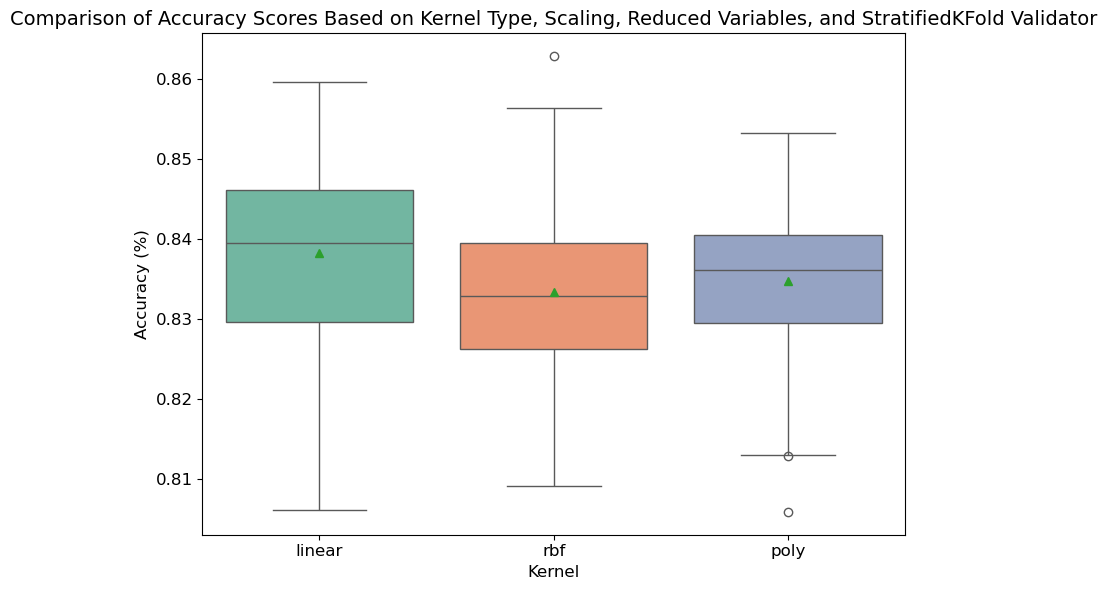

In [139]:
# Melt the DataFrame to prepare for plotting
df_kernel_comparison_stratified_kfold_melted = pd.melt(df_kernel_comparison_stratified_kfold)
df_kernel_comparison_stratified_kfold_melted.columns = ["Kernel", "AccuracyScore"]

# Create the boxplot for visual comparison
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_kernel_comparison_stratified_kfold_melted, x="Kernel", y="AccuracyScore", palette="Set2", hue="Kernel", showmeans=True)
plt.title("Comparison of Accuracy Scores Based on Kernel Type, Scaling, Reduced Variables, and StratifiedKFold Validator", fontsize=14)
plt.xlabel("Kernel", fontsize=12)
plt.ylabel("Accuracy (%)", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Show plot
plt.show()

### 5.7 Linear vs. RBF vs. Poly // Scaled // Reduced Variables // StratShuffleSplit

The evaluation is also conducted using Stratified Shuffle Split cross-validation, which randomly splits the dataset into training and test sets while preserving the class distribution in each split.

In [143]:
# Function to evaluate SVC kernels with StratifiedShuffleSplit cross-validation
def evaluate_svc_kernel_stratified_shufflesplit(kernel_type, X, y, n_splits=5, test_size=0.2, n_runs=100):
    accuracy_list = []
    
    # Create a pipeline for scaling and SVC model
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', SVC(kernel=kernel_type))
    ])
    
    for seed in range(1, n_runs + 1):
        # StratifiedShuffleSplit for preserving class distribution in splits
        sss = StratifiedShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=seed)

        # Perform cross-validation on the pipeline
        accuracy_score = cross_val_score(pipeline, X, y, cv=sss, scoring='accuracy')

        # Append the mean accuracy score from each fold
        accuracy_list.append(accuracy_score.mean())

    # Return the accuracy list and average accuracy
    average_acc = mean(accuracy_list)
    return accuracy_list, average_acc

# Define the reduced features and target variable
reduced_svc_features = [
    'Age', 'Sex', 'ChestPain_2', 'ChestPain_4', 'RestingBP', 'Chol', 'HeartRateMax',
    'ExeAngina', 'STDep', 'STSlope_2', 'ColouredMVCat_0', 'ColouredMVCat_1', 'ColouredMVCat_2',
    'ColouredMVCat_3', 'Thalass_3', 'Thalass_7'
]

X = df_combined_svc[reduced_svc_features]
y = df_combined_svc["DiagnosisYN"]

# Evaluate each kernel with StratifiedShuffleSplit cross-validation
kernels = ['linear', 'rbf', 'poly']
kernel_results_stratified_shufflesplit = {}

for kernel in kernels:
    accuracy_list, avg_acc = evaluate_svc_kernel_stratified_shufflesplit(kernel, X, y)
    kernel_results_stratified_shufflesplit[kernel] = {
        'accuracy_list': accuracy_list,
        'average_accuracy': avg_acc
    }
    print(f"{kernel.capitalize()} Kernel (StratifiedShuffleSplit) Accuracy: {avg_acc * 100:.2f}%\n")

# Convert results into DataFrame for easy comparison
df_kernel_comparison_stratified_shufflesplit = pd.DataFrame({
    kernel: results['accuracy_list'] for kernel, results in kernel_results_stratified_shufflesplit.items()
})

df_kernel_comparison_stratified_shufflesplit

Linear Kernel (StratifiedShuffleSplit) Accuracy: 84.09%

Rbf Kernel (StratifiedShuffleSplit) Accuracy: 83.48%

Poly Kernel (StratifiedShuffleSplit) Accuracy: 83.53%



,linear,rbf,poly
0,0.856667,0.853333,0.836667
1,0.876667,0.860000,0.860000
2,0.853333,0.860000,0.860000
3,0.820000,0.826667,0.836667
4,0.803333,0.833333,0.820000
...,...,...,...
95,0.826667,0.820000,0.820000
96,0.863333,0.866667,0.873333
97,0.806667,0.803333,0.800000
98,0.810000,0.826667,0.833333


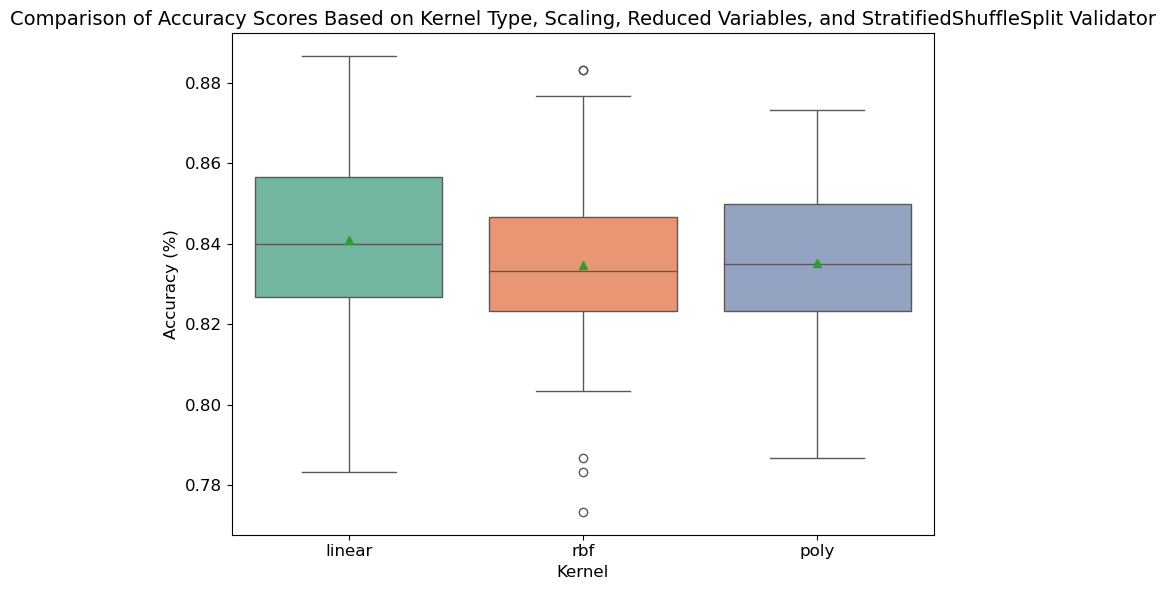

In [142]:

# Melt the DataFrame to prepare for plotting
df_kernel_comparison_stratified_shufflesplit_melted = pd.melt(df_kernel_comparison_stratified_shufflesplit)
df_kernel_comparison_stratified_shufflesplit_melted.columns = ["Kernel", "AccuracyScore"]

# Create the boxplot for visual comparison
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_kernel_comparison_stratified_shufflesplit_melted, x="Kernel", y="AccuracyScore", palette="Set2", hue="Kernel", showmeans=True)
plt.title("Comparison of Accuracy Scores Based on Kernel Type, Scaling, Reduced Variables, and StratifiedShuffleSplit Validator", fontsize=14)
plt.xlabel("Kernel", fontsize=12)
plt.ylabel("Accuracy (%)", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Show plot
plt.show()

### 5.8 GridSearchCV

In this section, we use **GridSearchCV** to identify the optimal hyperparameters for an SVC model based on multiple performance metrics: accuracy, recall, precision, and F1 score. 

The model is evaluated using cross-validation, and the best parameter combinations are found for each score. Additionally, various kernels, class weight options, regularization strengths, gamma values, and PCA component selections are explored through a systematic grid search. This method helps identify the most effective configuration for achieving the best scores.

In [210]:
results_dict = {}  # Initialize dictionary to store results

Function to run the grid search

In [248]:
# Function to run grid search and return results for different metrics
def run_grid_search(X, y, param_grid, score, seed):
    """
    Run GridSearchCV for the given parameters and return the best hyperparameters and scores.
    
    Args:
    X (DataFrame): Feature set for the model.
    y (Series): Target labels.
    param_grid (dict): Dictionary of hyperparameters for the grid search.
    score (str): The metric to optimize when refitting the model (e.g., 'accuracy', 'recall', 'precision', 'f1').
    seed (int): Random seed for reproducibility.
    
    Returns:
    tuple: A tuple containing the best parameters (dict) and a DataFrame with cross-validation results.
    """
    # Create the pipeline with scaling, PCA, and SVC
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA()),
        ('svc', SVC())
    ])
    
    # StratifiedKFold for cross-validation
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
    
    # Initialize GridSearchCV with cross-validation and scoring metrics
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        cv=skf,
        scoring=['accuracy', 'recall', 'precision', 'f1'],
        refit=score,  # Refit the model based on recall
        verbose=0,       # Set verbosity to 0 for minimal output
        n_jobs=-1        # Use all available CPU cores
    )
    
    # Fit the model with grid search
    grid_search.fit(X, y)
    
    # Get the best model from grid search
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    # Collect cross-validation results and extract relevant columns
    cv_results = pd.DataFrame(grid_search.cv_results_)
    cv_results_filtered = cv_results[[
        'param_svc__kernel', 
        'param_svc__C', 
        'param_svc__class_weight', 
        'param_svc__gamma', 
        'param_pca__n_components',
        'mean_test_accuracy',
        'mean_test_recall', 
        'mean_test_precision',
        'mean_test_f1'
    ]]
    
    # Rename columns for clarity
    cv_results_filtered.columns = ["kernel", "C", "weight", "gamma", "pca", "accuracy", "recall", "precision", "f1"]
    cv_results_filtered = cv_results_filtered.sort_values(by=score, ascending=False)
    # Return the best parameters and filtered cross-validation results
    return best_params, cv_results_filtered

Running grid search using **Recall** as the score:

In [250]:
# Define features and target variable
X = df_combined_svc[reduced_svc_features]
y = df_combined_svc["DiagnosisYN"]

# Define the parameter grid for grid search
param_grid = {
    'scaler': [StandardScaler()],
    'svc__kernel': ['linear', 'rbf', 'poly'],
    'svc__class_weight': [None, 'balanced'],
    'svc__C': [0.05, 0.1, 1, 10],
    'svc__gamma': ['scale', 'auto'],
    'pca__n_components': [None, 0.80, 0.90, 6, 7]
}

#####################################
# Choose the score for best_params_ #
score = 'recall'
#####################################

# Choose the column for the final table to sort by
column = f'best_{score}'

# Name the dataframe that will be created
df_name = f"grid_results_{score}"

# Initialize a list to store results
results = []

# Loop over 100 random seeds for cross-validation
for seed in range(1, 101):
    # Print which seed is being used
    print(f"Running with random seed: {seed}")
    
    # Run the grid search and get the results
    best_params, cv_results_filtered = run_grid_search(X, y, param_grid, score, seed)

    # Ensure cv_results_filtered is not empty before accessing .iloc[0]
    if not cv_results_filtered.empty:
        top_row = cv_results_filtered.iloc[0]
    
        # Append the best results to the results list
        results.append({
            'seed': seed,
            'kernel': top_row['kernel'],
            'C': top_row['C'],
            'weight': top_row['weight'],
            'gamma': top_row['gamma'],
            'pca': top_row['pca'],
            'best_accuracy': top_row['accuracy'],
            'best_recall': top_row['recall'],
            'best_precision': top_row['precision'],
            'best_f1': top_row['f1']
    })

        # Print the best hyperparameters for the current seed
        print(f"Best {score}: {top_row[score]:.4f}, Kernel: {top_row['kernel']}, C: {top_row['C']}, Weight: {top_row['weight']}, Gamma: {top_row['gamma']}, PCA: {top_row['pca']}")
        print()
    else:
        print(f"Warning: No valid results for seed {seed}")
        print()

results_dict[score] = pd.DataFrame(results).sort_values(by=column, ascending=False)

# Display the latest concatenated results for this score
print(f"Displaying all results for {score}:")
display(results_dict[score].head(10))  # Shows the latest results

Running with random seed: 1
Best recall: 0.9209, Kernel: rbf, C: 0.05, Weight: balanced, Gamma: auto, PCA: 6

Running with random seed: 2
Best recall: 0.9140, Kernel: rbf, C: 0.05, Weight: balanced, Gamma: auto, PCA: 6

Running with random seed: 3
Best recall: 0.9132, Kernel: rbf, C: 0.05, Weight: balanced, Gamma: auto, PCA: 7

Running with random seed: 4
Best recall: 0.9138, Kernel: rbf, C: 0.05, Weight: balanced, Gamma: auto, PCA: 7

Running with random seed: 5
Best recall: 0.9063, Kernel: rbf, C: 0.05, Weight: balanced, Gamma: auto, PCA: 7

Running with random seed: 6
Best recall: 0.9138, Kernel: rbf, C: 0.05, Weight: balanced, Gamma: auto, PCA: 7

Running with random seed: 7
Best recall: 0.9140, Kernel: rbf, C: 0.05, Weight: balanced, Gamma: auto, PCA: 7

Running with random seed: 8
Best recall: 0.9135, Kernel: rbf, C: 0.05, Weight: balanced, Gamma: auto, PCA: 7

Running with random seed: 9
Best recall: 0.9140, Kernel: rbf, C: 0.05, Weight: balanced, Gamma: auto, PCA: 7

Running wi

,seed,kernel,C,weight,gamma,pca,best_accuracy,best_recall,best_precision,best_f1
88,89,rbf,0.05,balanced,auto,6.0,0.796215,0.928571,0.721710,0.810902
17,18,rbf,0.05,balanced,auto,7.0,0.795932,0.921429,0.724219,0.807788
43,44,rbf,0.05,balanced,auto,6.0,0.786215,0.921429,0.710155,0.801562
35,36,rbf,0.05,balanced,auto,6.0,0.796045,0.921429,0.718576,0.806880
87,88,rbf,0.05,balanced,auto,7.0,0.795593,0.921429,0.735521,0.811830
50,51,rbf,0.05,balanced,auto,6.0,0.799435,0.921164,0.727715,0.811714
19,20,rbf,0.05,balanced,auto,7.0,0.785932,0.921164,0.709838,0.800470
61,62,rbf,0.05,balanced,auto,7.0,0.792938,0.921164,0.722354,0.807739
46,47,rbf,0.05,balanced,auto,6.0,0.792825,0.920899,0.719249,0.807013
48,49,rbf,0.05,balanced,auto,7.0,0.799548,0.920899,0.729015,0.812532


Running grid search using **accuracy** as the score:

In [251]:
# Define features and target variable
X = df_combined_svc[reduced_svc_features]
y = df_combined_svc["DiagnosisYN"]

# Define the parameter grid for grid search
param_grid = {
    'scaler': [StandardScaler()],
    'svc__kernel': ['linear', 'rbf', 'poly'],
    'svc__class_weight': [None, 'balanced'],
    'svc__C': [0.05, 0.1, 1, 10],
    'svc__gamma': ['scale', 'auto'],
    'pca__n_components': [None, 0.80, 0.90, 6, 7]
}

#####################################
# Choose the score for best_params_ #
score = 'accuracy'
#####################################

# Choose the column for the final table to sort by
column = f'best_{score}'

# Name the dataframe that will be created
df_name = f"grid_results_{score}"

# Initialize a list to store results
results = []

# Loop over 100 random seeds for cross-validation
for seed in range(1, 101):
    # Print which seed is being used
    print(f"Running with random seed: {seed}")
    
    # Run the grid search and get the results
    best_params, cv_results_filtered = run_grid_search(X, y, param_grid, score, seed)

    # Ensure cv_results_filtered is not empty before accessing .iloc[0]
    if not cv_results_filtered.empty:
        top_row = cv_results_filtered.iloc[0]
    
        # Append the best results to the results list
        results.append({
            'seed': seed,
            'kernel': top_row['kernel'],
            'C': top_row['C'],
            'weight': top_row['weight'],
            'gamma': top_row['gamma'],
            'pca': top_row['pca'],
            'best_accuracy': top_row['accuracy'],
            'best_recall': top_row['recall'],
            'best_precision': top_row['precision'],
            'best_f1': top_row['f1']
    })

        # Print the best hyperparameters for the current seed
        print(f"Best {score}: {top_row[score]:.4f}, Kernel: {top_row['kernel']}, C: {top_row['C']}, Weight: {top_row['weight']}, Gamma: {top_row['gamma']}, PCA: {top_row['pca']}")
        print()
    else:
        print(f"Warning: No valid results for seed {seed}")
        print()

results_dict[score] = pd.DataFrame(results).sort_values(by=column, ascending=False)

# Display the latest concatenated results for this score
print(f"Displaying all results for {score}:")
display(results_dict[score].head(10))  # Shows the latest results

Running with random seed: 1
Best accuracy: 0.8562, Kernel: poly, C: 0.1, Weight: balanced, Gamma: auto, PCA: 0.8

Running with random seed: 2
Best accuracy: 0.8598, Kernel: poly, C: 0.05, Weight: balanced, Gamma: auto, PCA: 7

Running with random seed: 3
Best accuracy: 0.8629, Kernel: poly, C: 1.0, Weight: None, Gamma: auto, PCA: 6

Running with random seed: 4
Best accuracy: 0.8563, Kernel: poly, C: 0.05, Weight: balanced, Gamma: auto, PCA: 0.8

Running with random seed: 5
Best accuracy: 0.8628, Kernel: poly, C: 1.0, Weight: None, Gamma: auto, PCA: 6

Running with random seed: 6
Best accuracy: 0.8562, Kernel: poly, C: 0.1, Weight: balanced, Gamma: auto, PCA: 6

Running with random seed: 7
Best accuracy: 0.8564, Kernel: poly, C: 0.05, Weight: balanced, Gamma: auto, PCA: 7

Running with random seed: 8
Best accuracy: 0.8631, Kernel: poly, C: 1.0, Weight: balanced, Gamma: scale, PCA: 6

Running with random seed: 9
Best accuracy: 0.8629, Kernel: poly, C: 0.05, Weight: balanced, Gamma: auto,

,seed,kernel,C,weight,gamma,pca,best_accuracy,best_recall,best_precision,best_f1
63,64,poly,0.10,balanced,scale,0.8,0.869605,0.770106,0.940909,0.845677
73,74,poly,0.05,balanced,auto,0.8,0.869379,0.776190,0.931166,0.845408
13,14,poly,1.00,None,auto,6.0,0.866384,0.820635,0.884799,0.849197
91,92,poly,1.00,balanced,scale,7.0,0.866384,0.813228,0.890744,0.850134
81,82,poly,0.10,None,auto,0.8,0.866271,0.769577,0.936154,0.842272
52,53,poly,1.00,None,auto,6.0,0.866158,0.826720,0.884524,0.851211
38,39,poly,1.00,balanced,auto,7.0,0.866158,0.819841,0.884071,0.850479
84,85,poly,1.00,balanced,scale,6.0,0.866158,0.776190,0.929630,0.843077
82,83,poly,0.10,None,auto,0.8,0.866045,0.776190,0.925231,0.841451
7,8,poly,1.00,balanced,scale,6.0,0.863051,0.792063,0.905989,0.843444


Running grid search using **precision** as the score:

In [252]:
# Define features and target variable
X = df_combined_svc[reduced_svc_features]
y = df_combined_svc["DiagnosisYN"]

# Define the parameter grid for grid search
param_grid = {
    'scaler': [StandardScaler()],
    'svc__kernel': ['linear', 'rbf', 'poly'],
    'svc__class_weight': [None, 'balanced'],
    'svc__C': [0.05, 0.1, 1, 10],
    'svc__gamma': ['scale', 'auto'],
    'pca__n_components': [None, 0.80, 0.90, 6, 7]
}

#####################################
# Choose the score for best_params_ #
score = 'precision'
#####################################

# Choose the column for the final table to sort by
column = f'best_{score}'

# Name the dataframe that will be created
df_name = f"grid_results_{score}"

# Initialize a list to store results
results = []

# Loop over 100 random seeds for cross-validation
for seed in range(1, 101):
    # Print which seed is being used
    print(f"Running with random seed: {seed}")
    
    # Run the grid search and get the results
    best_params, cv_results_filtered = run_grid_search(X, y, param_grid, score, seed)

    # Ensure cv_results_filtered is not empty before accessing .iloc[0]
    if not cv_results_filtered.empty:
        top_row = cv_results_filtered.iloc[0]
    
        # Append the best results to the results list
        results.append({
            'seed': seed,
            'kernel': top_row['kernel'],
            'C': top_row['C'],
            'weight': top_row['weight'],
            'gamma': top_row['gamma'],
            'pca': top_row['pca'],
            'best_accuracy': top_row['accuracy'],
            'best_recall': top_row['recall'],
            'best_precision': top_row['precision'],
            'best_f1': top_row['f1']
    })

        # Print the best hyperparameters for the current seed
        print(f"Best {score}: {top_row[score]:.4f}, Kernel: {top_row['kernel']}, C: {top_row['C']}, Weight: {top_row['weight']}, Gamma: {top_row['gamma']}, PCA: {top_row['pca']}")
        print()
    else:
        print(f"Warning: No valid results for seed {seed}")
        print()

results_dict[score] = pd.DataFrame(results).sort_values(by=column, ascending=False)

# Display the latest concatenated results for this score
print(f"Displaying all results for {score}:")
display(results_dict[score].head(10))  # Shows the latest results

Running with random seed: 1
Best precision: 0.9579, Kernel: poly, C: 0.05, Weight: None, Gamma: auto, PCA: 0.9

Running with random seed: 2
Best precision: 0.9526, Kernel: poly, C: 0.05, Weight: None, Gamma: scale, PCA: None

Running with random seed: 3
Best precision: 0.9557, Kernel: poly, C: 0.1, Weight: balanced, Gamma: scale, PCA: None

Running with random seed: 4
Best precision: 0.9632, Kernel: poly, C: 0.05, Weight: balanced, Gamma: auto, PCA: None

Running with random seed: 5
Best precision: 0.9618, Kernel: poly, C: 0.05, Weight: None, Gamma: scale, PCA: None

Running with random seed: 6
Best precision: 0.9596, Kernel: poly, C: 0.05, Weight: None, Gamma: scale, PCA: None

Running with random seed: 7
Best precision: 0.9532, Kernel: poly, C: 0.05, Weight: None, Gamma: scale, PCA: None

Running with random seed: 8
Best precision: 0.9542, Kernel: poly, C: 0.1, Weight: None, Gamma: scale, PCA: 0.9

Running with random seed: 9
Best precision: 0.9631, Kernel: poly, C: 0.05, Weight: Non

,seed,kernel,C,weight,gamma,pca,best_accuracy,best_recall,best_precision,best_f1
64,65,poly,0.05,None,scale,0.8,0.749322,0.475661,0.975735,0.633911
38,39,poly,0.05,None,scale,0.9,0.735819,0.446032,0.973333,0.610836
30,31,poly,0.05,None,scale,NaN,0.712316,0.395238,0.973214,0.554325
79,80,poly,0.05,None,scale,NaN,0.725819,0.424868,0.971429,0.588722
78,79,poly,0.05,None,scale,NaN,0.715763,0.402910,0.971429,0.565118
14,15,poly,0.05,None,scale,6.0,0.779605,0.548413,0.968687,0.680414
19,20,poly,0.05,balanced,auto,NaN,0.796158,0.583333,0.968421,0.726614
36,37,poly,0.05,None,scale,NaN,0.725706,0.424074,0.968235,0.583664
87,88,poly,0.05,None,scale,0.9,0.742429,0.460317,0.967949,0.621608
26,27,poly,0.05,None,scale,NaN,0.712486,0.396296,0.967532,0.556879


Running grid search using **f1** as the score:

In [253]:
# Define features and target variable
X = df_combined_svc[reduced_svc_features]
y = df_combined_svc["DiagnosisYN"]

# Define the parameter grid for grid search
param_grid = {
    'scaler': [StandardScaler()],
    'svc__kernel': ['linear', 'rbf', 'poly'],
    'svc__class_weight': [None, 'balanced'],
    'svc__C': [0.05, 0.1, 1, 10],
    'svc__gamma': ['scale', 'auto'],
    'pca__n_components': [None, 0.80, 0.90, 6, 7]
}

#####################################
# Choose the score for best_params_ #
score = 'f1'
#####################################

# Choose the column for the final table to sort by
column = f'best_{score}'

# Name the dataframe that will be created
df_name = f"grid_results_{score}"

# Initialize a list to store results
results = []

# Loop over 100 random seeds for cross-validation
for seed in range(1, 101):
    # Print which seed is being used
    print(f"Running with random seed: {seed}")
    
    # Run the grid search and get the results
    best_params, cv_results_filtered = run_grid_search(X, y, param_grid, score, seed)

    # Ensure cv_results_filtered is not empty before accessing .iloc[0]
    if not cv_results_filtered.empty:
        top_row = cv_results_filtered.iloc[0]
    
        # Append the best results to the results list
        results.append({
            'seed': seed,
            'kernel': top_row['kernel'],
            'C': top_row['C'],
            'weight': top_row['weight'],
            'gamma': top_row['gamma'],
            'pca': top_row['pca'],
            'best_accuracy': top_row['accuracy'],
            'best_recall': top_row['recall'],
            'best_precision': top_row['precision'],
            'best_f1': top_row['f1']
    })

        # Print the best hyperparameters for the current seed
        print(f"Best {score}: {top_row[score]:.4f}, Kernel: {top_row['kernel']}, C: {top_row['C']}, Weight: {top_row['weight']}, Gamma: {top_row['gamma']}, PCA: {top_row['pca']}")
        print()
    else:
        print(f"Warning: No valid results for seed {seed}")
        print()

results_dict[score] = pd.DataFrame(results).sort_values(by=column, ascending=False)

# Display the latest concatenated results for this score
print(f"Displaying all results for {score}:")
display(results_dict[score].head(10))  # Shows the latest results

Running with random seed: 1
Best f1: 0.8324, Kernel: linear, C: 0.1, Weight: None, Gamma: scale, PCA: None

Running with random seed: 2
Best f1: 0.8430, Kernel: linear, C: 10.0, Weight: balanced, Gamma: auto, PCA: None

Running with random seed: 3
Best f1: 0.8434, Kernel: poly, C: 1.0, Weight: None, Gamma: auto, PCA: 6

Running with random seed: 4
Best f1: 0.8361, Kernel: linear, C: 1.0, Weight: balanced, Gamma: auto, PCA: None

Running with random seed: 5
Best f1: 0.8438, Kernel: linear, C: 0.05, Weight: None, Gamma: scale, PCA: None

Running with random seed: 6
Best f1: 0.8449, Kernel: linear, C: 1.0, Weight: balanced, Gamma: auto, PCA: None

Running with random seed: 7
Best f1: 0.8338, Kernel: linear, C: 10.0, Weight: balanced, Gamma: auto, PCA: 0.9

Running with random seed: 8
Best f1: 0.8434, Kernel: poly, C: 1.0, Weight: balanced, Gamma: scale, PCA: 6

Running with random seed: 9
Best f1: 0.8392, Kernel: poly, C: 0.05, Weight: balanced, Gamma: auto, PCA: 7

Running with random se

,seed,kernel,C,weight,gamma,pca,best_accuracy,best_recall,best_precision,best_f1
13,14,linear,10.0,balanced,auto,NaN,0.866215,0.835185,0.875150,0.851754
52,53,poly,1.0,None,auto,6.0,0.866158,0.826720,0.884524,0.851211
38,39,poly,1.0,balanced,auto,7.0,0.866158,0.819841,0.884071,0.850479
91,92,poly,1.0,balanced,scale,7.0,0.866384,0.813228,0.890744,0.850134
16,17,rbf,1.0,balanced,auto,NaN,0.862825,0.834127,0.866777,0.849306
21,22,poly,10.0,balanced,scale,6.0,0.862938,0.820106,0.877852,0.847678
66,67,rbf,10.0,balanced,scale,6.0,0.855819,0.841534,0.856068,0.846604
37,38,poly,1.0,balanced,scale,6.0,0.863051,0.806085,0.893793,0.846388
99,100,rbf,1.0,None,auto,0.8,0.859379,0.834392,0.860077,0.846282
63,64,poly,0.1,balanced,scale,0.8,0.869605,0.770106,0.940909,0.845677


## 6. Final Models

### 6.1 Final 1 // linear // weight balanced // C 10 // gamma scale

In [257]:
# Define feature set and target variable
X = df_combined_svc[reduced_svc_features]
y = df_combined_svc["DiagnosisYN"]

# Store results for each seed
results = []

# Loop through 500 different random seeds
for seed in range(1, 501):
    print(f"Running with seed: {seed}")
    
    # Define pipeline: StandardScaler + SVC with predefined parameters
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  
        ('svc', SVC(kernel='linear', class_weight='balanced', C=10, gamma='scale'))
    ])
    
    # Perform 5-fold stratified cross-validation
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

    # Evaluate model performance using multiple metrics
    scores = cross_validate(
        pipeline, X, y, cv=skf, 
        scoring=['accuracy', 'recall', 'precision', 'f1'],
        return_train_score=False
    )

    # Compute mean scores across folds
    mean_accuracy = scores['test_accuracy'].mean()
    mean_recall = scores['test_recall'].mean()
    mean_precision = scores['test_precision'].mean()
    mean_f1 = scores['test_f1'].mean()

    # Display key results
    print(f"Seed {seed} - Accuracy: {mean_accuracy:.4f}, Recall: {mean_recall:.4f}")

    # Append results to list
    results.append([seed, mean_accuracy, mean_recall, mean_precision, mean_f1])

# Convert results list to DataFrame
linear_10_balanced_scale_nopca = pd.DataFrame(results, columns=['Seed', 'Accuracy', 'Recall', 'Precision', 'F1'])

# Display final DataFrame
linear_10_balanced_scale_nopca

Running with seed: 1
Seed 1 - Accuracy: 0.8324, Recall: 0.7910
Running with seed: 2
Seed 2 - Accuracy: 0.8597, Recall: 0.8209
Running with seed: 3
Seed 3 - Accuracy: 0.8461, Recall: 0.8265
Running with seed: 4
Seed 4 - Accuracy: 0.8495, Recall: 0.8058
Running with seed: 5
Seed 5 - Accuracy: 0.8428, Recall: 0.8124
Running with seed: 6
Seed 6 - Accuracy: 0.8528, Recall: 0.8423
Running with seed: 7
Seed 7 - Accuracy: 0.8363, Recall: 0.8138
Running with seed: 8
Seed 8 - Accuracy: 0.8527, Recall: 0.8130
Running with seed: 9
Seed 9 - Accuracy: 0.8361, Recall: 0.7979
Running with seed: 10
Seed 10 - Accuracy: 0.8394, Recall: 0.8053
Running with seed: 11
Seed 11 - Accuracy: 0.8327, Recall: 0.7905
Running with seed: 12
Seed 12 - Accuracy: 0.8228, Recall: 0.7627
Running with seed: 13
Seed 13 - Accuracy: 0.8395, Recall: 0.8132
Running with seed: 14
Seed 14 - Accuracy: 0.8662, Recall: 0.8352
Running with seed: 15
Seed 15 - Accuracy: 0.8462, Recall: 0.7918
Running with seed: 16
Seed 16 - Accuracy: 0

,Seed,Accuracy,Recall,Precision,F1
0,1,0.832429,0.791005,0.846753,0.815903
1,2,0.859718,0.820899,0.868425,0.842957
2,3,0.846102,0.826455,0.843721,0.832086
3,4,0.849492,0.805820,0.865842,0.831578
4,5,0.842768,0.812434,0.850571,0.828247
...,...,...,...,...,...
495,496,0.845989,0.820106,0.849513,0.831848
496,497,0.839605,0.805556,0.847547,0.823785
497,498,0.836158,0.805820,0.840232,0.819489
498,499,0.835989,0.805820,0.842921,0.820499


Summary of Results:
Accuracy     0.836697
Recall       0.803247
Precision    0.842755
F1           0.819926
dtype: float64


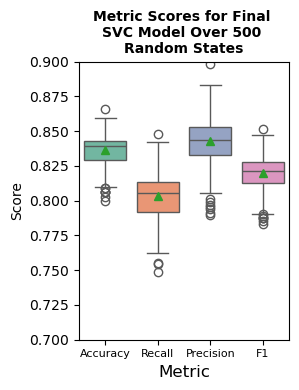

In [258]:
# Select only relevant performance metrics
linear_10_balanced_scale_nopca = linear_10_balanced_scale_nopca.filter(['Accuracy', 'Recall', 'Precision', 'F1'], axis=1)

# Compute mean values for each metric
linear_10_balanced_scale_nopca_means = linear_10_balanced_scale_nopca.mean()
print("Summary of Results:")
print(linear_10_balanced_scale_nopca_means)

# Reshape data for visualization
linear_10_balanced_scale_nopca_melted = pd.melt(linear_10_balanced_scale_nopca, var_name="Metric", value_name="Score")

# Create boxplot to visualize distribution of metric scores
plt.figure(figsize=(3, 4))
sns.boxplot(
    data=linear_10_balanced_scale_nopca_melted,
    x="Metric",
    y="Score",
    hue="Metric",
    palette="Set2",
    showmeans=True
)

# Set plot titles and labels
plt.title("Metric Scores for Final \nSVC Model Over 500 \nRandom States", fontsize=10, fontweight='bold')
plt.xlabel("Metric", fontsize=12)
plt.ylabel("Score", fontsize=10)
plt.ylim(0.7, 0.9)

# Adjust x-axis labels
plt.xticks(
    ticks=[0, 1, 2, 3], 
    labels=['Accuracy', 'Recall', 'Precision', 'F1'],
    fontsize=8
)

# Remove legend
plt.legend([], [], frameon=False)

# Adjust layout for better spacing
plt.tight_layout()
plt.subplots_adjust(left=0.25)

# Show the plot
plt.show()